# SOLID原則とは

# New Section

ロバート・C・マーティン（通称、Bobおじさん）が提唱した、オブジェクト指向開発の5つの原則

5つの原則を守ることで、保守しやすいソフトウェアを設計できるようになる



**SOLID原則**

*   単一責任の原則（**S**ingle Responsibility Principle）
*   オープン・クローズドの原則（**O**pen-Closed Principle）
*   リスコフの置換原則（**L**iskov Substitution Principle）
*   インタフェース分離の原則（**I**nterface Segregation Principle）
*   依存関係逆転の原則（**D**ependency InversionPrinciple

## ソフトウェアの保守とは



既存のソフトウェアに対し、

バグの修正や機能の改良・最適化を行うことで、

**正常な動作を維持する**ためのプロセスのこと



保守性が重要なのは、ソフトウェアの変更は避けられないから

⇒　ソフトウェアはビジネスと直結したものであり、ビジネスは時間と共に変化する

⇒　なるべく**変更に強く、保守しやすいソフトウェアを作成する**ことが重要

エンジニアが避けれらない3つのこと（「[オブジェクト指向のこころ](https://hiramatsuu.com/archives/1433)」より）

*   死
*   税金
*   仕様変更

変更があることを前提に、保守しやすいソフトウェアを設計して、仕様変更に対応できるようにすることが重要

⇒　保守しやすいソフトウェアを開発するために、**SOLID原則**を活用する必要がある


## 保守性を向上させる方法

ソフトウェアの品質には、保守性以外にも、さまざまな要素がある

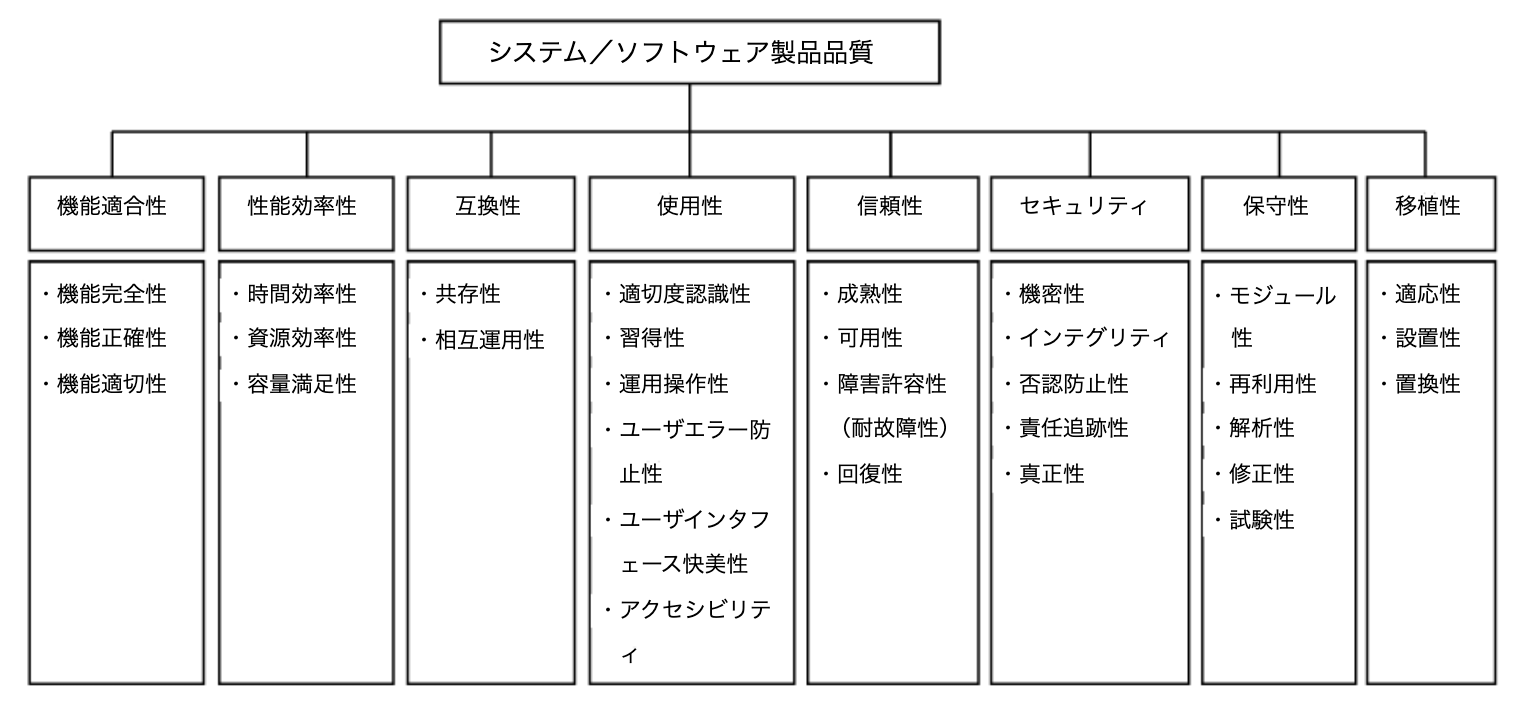

上図は、[JIS X 25010：2013](https://kikakurui.com/x2/X25010-2013-01.html)より引用



保守性の向上において、いちばん重要な要素は、**変更のしやすさ（修正性）**

変更がしやすければ、他の要素は勝手に付いてくる

*   変更しやすいコードは、依存関係がシンプルで、モジュール性が高い
*   モジュール性が高くなると、再利用性・試験性（テストしやすさ）も高くなる
*   変更しやすいコードは、解析性（理解しやすさ）も高い

SOLID原則も、変更しやすさを向上させることで、保守性を向上する

## SOLID原則を学ぶメリット



**オブジェクト指向の3大要素**

*   クラス（カプセル化）
*   継承
*   ポリモーフィズム



実際のところ、3大要素を学んだだけでは、オブジェクト指向を最大限活用することはできない

⇒　これらはオブジェクト指向の**構成要素**でしかない（英単語だけ知ってても英作文はできない）

⇒　SOLID原則を理解して、3大要素の効果的な使い方を身につける必要がある


あなたは、次のコードの問題点を指摘できますか？

In [ ]:
#　通知を送るクラス
class Notification:
    def send(self, notification_type: str, user_id: int) -> None:
        if notification_type == 'email':
            # メールで通知を送信
            print('メール')
        elif notification_type == 'sms':
            # SMSで通知を送信
            print('SMS')
        elif notification_type == 'push':
            # プッシュ通知を送信
            print('プッシュ通知')

SOLID原則を習得すると、

変更しづらいコードに気づいて、変更しやすいコードに改善できるようになる

⇒　**オブジェクト指向の「目」を養う**ことができる

## 本コースの実行環境

In [ ]:
!python --version

Python 3.10.12


本コースは、ひらまつが提供している

「[Python でわかる オブジェクト指向 とはなにか？【Python オブジェクト指向 の「なぜ？」を「徹底的に」解説】](https://www.udemy.com/course/oop-python/?referralCode=E4B346B10A3E0755DA54)」

の知識を前提としているため、

わからない知識があれば、こちらも参照してください

# SOLID原則を学ぶ前の前提知識

SOLID原則を学ぶ前に、以下の重要事項について学んでおきましょう

*   例外
*   型ヒント（type hints）
*   フールプルーフとアクセス制限
*   クラスの依存関係

## 例外

Pythonにおいて、エラーには大きく分けて2種類がある

*   **構文エラー（syntax error）**
*   **例外（exception）**

**構文エラー（syntax error）**とは？


⇒　プログラムの構文を間違えたことによるエラーのこと


In [ ]:
for i in range(5) #コロン（:）が抜けている
    print(i)

SyntaxError: ignored

**例外（exception）**とは？

⇒　構文の誤り以外の理由で発生するエラーのこと

In [ ]:
print(10 / 0) # ZeroDivisionError

ZeroDivisionError: ignored

In [ ]:
print(hoge) # NameError

NameError: ignored

In [ ]:
print(1 + '1') # TypeError

TypeError: ignored

構文エラーはゼロにすることができるが、

例外は開発者の努力だけではなくすことがむずかしい

⇒　ユーザーの想定外の操作や、利用している外部サービスの異常時にも発生してしまうため

In [ ]:
# ユーザーの入力値によって、例外が発生する
n = int(input('整数値を入力してください：'))
print(n)

整数値を入力してください：a


ValueError: ignored

上のコードでは、数値以外を入力するとint()で処理できないため、

ValueErrorという例外が出る



例外の発生をそのままにしておくと起こる問題

*   アプリケーションがクラッシュする
*   ユーザーにエラーメッセージが表示される
*   データの不整合が発生する可能性がある
*   その結果として、企業やサービスの信頼が低下する

⇒　予想される例外への対処を、あらかじめ用意しておく必要がある

⇒　これが、**例外処理**

### 例外処理（try/except/else/finally）



**例外の発生時に行う処理**のこと

適切な例外処理を行うことで、例外が発生しても重大な問題が起こらないようにできる

**try/except**を使うのが、例外処理の基本

*   try：例外が発生する可能性のある処理を記述する
*   except：例外が発生した場合に行う処理を記述する

例外処理（try文）の基本の書式

```
try:
    例外の発生が予想される処理
except 捕捉（catch）する例外の種類:
    try節の中で例外が発生した場合の処理
```

In [ ]:
while True:
    try: # 以下の処理に例外が発生するかチェック
        n = int(input('整数値を入力してください：'))
        print(n)
        break
    except ValueError: # 例外（Value Error）が発生した場合に以下の処理が実行される
        print('整数値ではありません。入力し直してください。')

整数値を入力してください：a
整数値ではありません。入力し直してください。
整数値を入力してください：１
1


try節で例外が発生すると、

以降のtry節内の処理は実行されずに、except節に飛ぶ

except節は、例外ごとに2個以上書くことも可能

```
try:
    例外の発生が予想される処理
except 捕捉（catch）する例外1:
    try節の中で例外1が発生した場合の処理
except 捕捉（catch）する例外2:
    try節の中で例外2が発生した場合の処理
```

try/exceptに加えて、**else/finally**もある

*   else：例外が発生しなかった場合に行う処理を記述する
*   finally：例外が発生してもしなくても行う処理を記述する

例外処理の書式（完全版）

```
try:
    例外の発生が予想される処理
except 捕捉（catch）する例外の種類:
    tryの中で例外が発生した場合の処理
else:
    tryの中で例外が発生しなかった場合の処理
finally:
    例外の発生の有無によらず実行する処理
```

In [ ]:
i = 0

while True:
  try:
    n = int(input('整数値を入力してください：'))
  except ValueError:
    print('整数値ではありません。入力し直してください。')
  else: # 例外が発生しない場合に以下の処理が実行される
    print('正常な値が入力されました。')
    print(n)
    break
  finally: # 例外が発生してもしなくも以下の処理が実行される
    i += 1

print(f'{i}回目の入力で成功しました。')

finally節には、データベースの切断などの後始末の処理を記述するのが基本

else句には、例外が発生しない場合に、後始末処理の前に行いたい処理を記述する

⇒　try句の記述を最小限にできる

try句に書く処理は最少にするのがポイント

⇒　どの行で例外が発生したのかをわかりやすくするため

### アンチパターン：例外の握りつぶし

**発生した例外を意図的に無視すること**

ValueErrorなどの例外もオブジェクトであり、

**すべての例外（のクラス）は、Exceptionクラスを継承している**

⇒　すべてのクラスがobjectクラスを継承しているのと同様（わからない方は[こちら](https://www.udemy.com/course/oop-python/?referralCode=E4B346B10A3E0755DA54)）

⇒　exceptに以下のように指定すると、すべての例外をキャッチする

```
except Exception:
    例外が発生した場合の処理
```

そのため、次のようにすることで、すべての例外を無視できる

```
try:
    例外が発生するかもしれない処理
except Exception:
    pass
```

例外を握りつぶすことは、今解決すべき問題の先送りでしかない

例えるなら、欠陥住宅をつくるようなもの

⇒　初めはいいが、後から問題が発覚し、企業・ソフトウェア開発者としての信用ガタ落ち

また、キャッチする例外は、なるべく具体的な方が望ましいので、
```
while True:
    try:
        n = int(input('整数値を入力してください：'))
        print(n)
        break
    except Exception: # 抽象的な例外
        print('整数値ではありません。入力し直してください。')
```

上記のコードよりも、下記のコードの方が望ましい
```
while True:
    try:
        n = int(input('整数値を入力してください：'))
        print(n)
        break
    except ValueError: # 具体的な例外
        print('整数値ではありません。入力し直してください。')
```





### 例外を発生させる（raise）

例外を意図的に発生させることも可能

⇒　自作クラスが想定していない使われ方をした時などに使える

⇒　例外を発生させるには**raise**を用いて、以下のように記述する



```
raise　例外クラス('メッセージ')
```


例えば、ユーザーを表現するUserクラスにおいて、

ユーザー名は20文字以下にする必要があるとする

In [ ]:
class User:
  def __init__(self, name):
    self.name = name

# 20文字よりも長いユーザー名で初期化できてしまう
user = User('じゅげむじゅげむごこうのすりきれかいじゃりすいぎょのすいぎょうまつ')

次のコードのように、ユーザー名が20文字以下でないと、

例外が発生するようにしておけば、不正なユーザー名を防げる

In [ ]:
class User:
  def __init__(self, name):
    if len(name) > 20: # 20文字よりも長いユーザー名なら
      raise ValueError('ユーザー名が20文字を超えています。') # ValueErrorを発生させる

    self.name = name

# 20文字よりも長いユーザー名で初期化できない
user = User('じゅげむじゅげむごこうのすりきれかいじゃりすいぎょのすいぎょうまつ...')

不正な値が与えられた場合には、例外を発生させるようにすることで、

クラスやメソッドの正しい使用を強制できる

⇒　不正な値が渡されたら例外を発生させるような、メソッドの先頭の記述を**ガード節**という


int関数の実装のイメージ

```
def int(引数):
    if 引数が数値ではない:
        raise ValueError('invalid literal for int()...')
            ︙
            ︙
    return int型にされた引数

```



組み込みの機能と同様に、

自作のクラスのメソッドにもガード節を導入することで、

クラスの正常動作を保証する必要がある



## Pythonの機能：型ヒント（type hints）

**変数や引数、戻り値などの型を指定する機能**のこと

型ヒントを使うことで、コードの可読性が高まり、データ型の扱いのミスに気付きやすくなる

In [ ]:
#型ヒントを使わずに関数を定義
def plus_two_numbers(n1, n2):
    return n1 + n2

上のコードの問題点

*   コードを見ただけでは、引数にどのデータ型を渡せば良いのかわからない
*   戻り値のデータ型もわからない

⇒　コードから仕様がわからない上に、データ型のミスも起こりやすい

In [ ]:
#型ヒントを使った場合
def plus_two_numbers(n1: int, n2: int) -> int: #引数も戻り値もint型を想定している
    return n1 + n2

print(plus_two_numbers('1','1')) #実行時には、型ヒントは無視されるのでエラーは出ない

11


型ヒントを使うメリット

*   どのようなデータ型を想定しているかが、関数の定義から一目瞭然
*   エディタやIDEを使えば、型の不一致があるとエラー（警告）を出してくれる
*   抽象への依存を意識しやすい（後ほど解説）


型ヒントを使うデメリット
*   コードの記述量が増える

mypyというモジュールを使うことで、型をチェックしてくれるようになる

[mypy公式ドキュメント](https://mypy.readthedocs.io/)

また、型ヒントを使うことで、

Pythonのコードも、静的型付け言語のような見た目にできるので、

他のプログラミング言語にも活かせる学びが得られる

⇒　本講座では、型ヒントを使用する

### 関数（メソッド）の型ヒント

型ヒントを使うと、関数（メソッド）の仕様を明確にすることができる

In [ ]:
def plus_two_numbers(n1: int, n2: int) -> int: # 引数の型と、戻り値の型を記載している
    return n1 + n2

関数における型ヒントの使い方は以下

```
def 関数名(引数1:型, 引数2:型, ...) -> 戻り値の型:
    処理

```

引数と戻り値のデータ型を指定することができる

### 変数の型ヒント

変数の定義時にも、型ヒントが使える

In [ ]:
def greeting(name: str) -> str: # 引数の型と、戻り値の型を記載している
    return 'Hello ' + name

# 変数の型を指定している
first_name: str = 'Shotaro'
last_name: str = 'Hiramatsu'

print(greeting(f'{first_name} {last_name}')) # f文字列を使用

Hello Shotaro Hiramatsu


変数定義時の型ヒントの使い方は以下

```
変数名:　型 = 値

```

### コンテナオブジェクトの型ヒント

listやdictなどの、コンテナオブジェクトでは、

コンテナの型と、要素の型をそれぞれ指定する（Python3.9以降）

In [ ]:
number_list: list[int] = [1,2,3] # 要素がintのｌｉｓｔ
str_int_dict: dict[str, int] = {'a': 1, 'b': 2} # キーがstr、値がintのdict

変数定義時の型ヒントの使い方は以下

```
# listやtupleの場合
変数名: コンテナの型[要素の型] = 値

# dictの場合
変数名: dict[キーの型, 値の型] = 値
```

### 独自の型にも使える

In [ ]:
class Hoge:
    def __init__(self, value: str) -> None: # コンストラクタなど戻り値がない場合はNoneを指定
        self.value = value

def print_hoge(hoge: Hoge) -> None: # 引数はHogeクラスのオブジェクト
    print(hoge.value)


hoge: Hoge = Hoge('ほげほげ')
print_hoge(hoge)

ほげほげ


### 型ヒントの使い所

大規模なプロジェクトには必須

簡単なスクリプトを書く程度であれば、指定する必要はない

⇒　あらゆる場面に当てはまるが、**メリットがコストを上回るなら採用するべき**

## フールプルーフ（foolproof）とアクセス制限

フールプルーフ（foolproof）とは、

身もふたもない言い方をすれば**「バカにも耐える」設計**にすること

耐水（waterproof）と同じ

ユーザーの思慮深さに頼るのではなく、

**誤った操作をそもそもできないようにする**ことで、**正しい使用を強制する**設計思想

フールプルーフの例は、私たちの身の回りにたくさんある

*   電子レンジ：ドアを閉めないと運転を開始できない
*   洗濯機：運転中にはドアがロックされる
*   トイレのウォシュレット：座らないと水がでない

フールプルーフの考えに基づき、多くのプログラミング言語では、

クラス内部からのみアクセスが可能な

プライベートな属性やメソッドを定義することが可能


例えば、Javaでは、

publicやprivateなどのキーワードを使うことで、

外部からのアクセスを制御できる

```
// Javaの場合

public class MyClass {
    // プライベートな属性
    private int myAttribute;

    // パブリックなコンストラクタ
    public MyClass(int myAttribute) {
        this.myAttribute = myAttribute;
    }

    // プライベートなメソッド
    private void myPrivateMethod() {
        System.out.println('This is a private method!');
    }

    // パブリックなメソッドからプライベートなメソッドを呼び出す
    public void publicMethod() {
        myPrivateMethod();
    }
}
```



ガード節もフールプルーフの考え方と言える

「これをやらない」という紳士協定よりも、「できないようにする」方が安心して使える

### Pythonにおけるアクセス制限

一方で、Pythonにおいては、

クラス内部からのみアクセスできる、

プライベートな属性を定義することはできない

Pythonは

「**みんな大人なんだから（We are all consenting adults here.）**」

というモットーで設計されているため

⇒　制約よりも自由を選択する

### Pythonでプライベートな属性・メソッドを表現する方法

Pythonでは、慣例として、

プライベートな属性・メソッドには、

**名前の先頭に _（アンダースコア）**をつける

In [ ]:
class MyClass:
    def __init__(self, value: str) -> None:
        self._value = value # _valueは、クラスの外部からはアクセスしない変数としている

    def _private_method(self) -> None:
        print('クラスの外部からは呼び出せないメソッドとする')

    def public_method(self) -> None:
        print('どこからでも呼び出せるメソッドとする')


my_class = MyClass(5)
print(my_class._value) # 実際にはアクセス可能
my_class._private_method() # 実際には呼び出し可能

5
クラスの外部からは呼び出せないメソッドとする


一応、Pythonにもアクセスを制限する機能として、

*   名前マングリング（name mangling）
*   @propertyデコレータ

などの機能があるが、

どちらも完全にプライベートな属性・メソッドを定義することはできない

### Pythonの機能：名前マングリング（name mangling）

「__変数名」というような、

先頭に2個以上のアンダースコア、末尾に1個以下のアンダースコア※という形式で書くと、

**「_クラス名__変数名」というテキストに置換される**ことによって

通常のアクセス方法では、クラス外部からアクセスできない変数を定義できる機能

※\__init__や\__add__などの特殊メソッドは、

末尾にアンダースコアが2つあるので、name manglingが行われない





※「変数名_」という変数名は、

Pythonであらかじめ使われている名前との衝突を避ける目的で使用される

In [ ]:
class Circle:
    # クラスの中のメソッドからしか呼び出せないクラス変数
    # Pythonにおいて、定数は慣例的に大文字
    __PI = 3.14

    def __init__(self, r):
        self.__r = r # 「_Circle__r」という変数名に置換されている

    def length(self):
        return self.__r * 2 * Circle.__PI

    def area(self):
        return self.__r * self.__r * Circle.__PI

# print(Circle.__PI) # クラス外部から呼び出せない（ように見える）
circle = Circle(5)
# print(circle.__r) # クラス外部から呼び出せない（ように見える）
print(circle._Circle__PI)  # 「_クラス名__属性名」とすれば呼び出せてしまう
print(circle._Circle__r)

3.14
5


name manglingを使っても、

結局クラス外部からのアクセスを禁止することはできないので、

前述した「_変数名」という形式で

内部だけで使うことを示す方が好まれる（[PEP 8](https://pep8-ja.readthedocs.io/ja/latest/)でも推奨されている）



name manglingは、

親クラスと子クラスで属性の名前が衝突したことで、

親クラスの属性を、子クラスで上書きしてしまうことを避ける用途で使われる


In [ ]:
class A:
    def __init__(self):
        self.__hoge = 123  # _A__hogeに置換される

    def print_hoge(self):
        print(self.__hoge)  # _A__hogeを出力

class B(A):
    def __init__(self):
        super().__init__()
        self.__hoge = 456  # _B__hogeに置換される

b = B()
b.print_hoge()
print(b._A__hoge)
print(b._B__hoge)

123
123
456


### Pythonの機能：@propertyデコレータ

**メソッドを属性のように参照できるようにする機能**

主に次のような用途で使われる
*   属性を読み取り専用（もどき）にして外部に公開する
*   値のアクセスの前後に処理を挟む

次のようにすることで、

オブジェクトの属性を読み取り専用（もどき）にすることができる

In [ ]:
class Rectangle:
    def __init__(self, width: int, height: int) -> None:
        self._width = width
        self._height = height

    #　width属性にアクセスすると呼び出されるメソッド
    @property
    def width(self) -> int:
        return self._width

    #　height属性にアクセスすると呼び出されるメソッド
    @property
    def height(self) -> int:
        return self._height

    # クラスの内部からは変更可能
    def change_value(self, width, height) -> None:
        self._width = width
        self._height = height


rectangle = Rectangle(5, 3)
print(rectangle.width)  # rectangle.width()が呼び出される
# rectangle.width = 8  # 外部から書き込みはできない
rectangle.change_value(1,2) # エラーにならない
rectangle._width = 8  # 実際には、クラス外部から変更できてしまう
print(rectangle.width)

5
8


外部から読み取りは可能だが、

変更はクラス内部からのみ行えるようにしたい変数の定義に使用する

@propertyデコレータとあわせて、

@変数名.setterデコレータを使うことで、

属性の上書きの前後に処理を挟むことができる

⇒　不正値の代入時には例外を発生させることで、不正値が入り得ないようにする



In [ ]:
class Rectangle:
    def __init__(self, width: int, height: int) -> None:
        self._width = width
        self._height = height

    @property
    def width(self) -> int:
        return self._width

    #　width属性が上書きされた時(rectangle.width = 値)に呼び出されるメソッド
    @width.setter
    def width(self, value: int) -> None:
        if value < 0:
            raise ValueError('幅は0以上である必要があります')
        self._width = value

    @property
    def height(self) -> int:
        return self._height

    #　height属性が上書きされた時(rectangle．ｈｅｉｇｈｔ = 値)に呼び出されるメソッド
    @height.setter
    def height(self, value: int) -> None:
        if value < 0:
            raise ValueError('高さは0以上である必要があります')
        self._height = value


rectangle = Rectangle(5, 3)
print(rectangle.width)  # 属性の読み取り
rectangle.width = 8  # 外部からの書き込みが可能に
# rectangle.height = -2  # エラー: バリデーションによる例外発生

### フールプルーフとアクセス制限まとめ

*   プログラミング言語によって、設計思想が異なるので、

    言語に合ったスタイルでプログラミングをしよう
*   Pythonでは完全にプライベートな属性やメソッドを定義することはできないが、

    「_変数・メソッド名」とすることで、内部だけで使用することを示すのが慣例


## クラスの依存関係

モジュールAが、モジュールBを使用しているとき、

「モジュールAは、モジュールBに**依存している**」と言う

### 主な依存関係（継承とコンポジション）

クラス間の依存関係には、主に**継承**と**コンポジション**がある

In [ ]:
# クラスAはクラスBに依存している（継承）
class A(B):
    def method_a(self):
        super().method_b() # クラスBのメソッドを呼び出して使用

# クラスBはstrクラスに依存している
class B:
    def method_b(self):
        print('Class B method')

コンポジション（composition）は、「構成、合成」の意味

あるクラスの一部を、別のクラスが構成しているという関係性がコンポジション

In [ ]:
# クラスAはクラスBに依存している（コンポジション）
class A:
    def __init__(self):
        self.b = B() # クラスBをインスタンス変数として保持

    def method_a(self):
        self.b.method_b() # クラスBのメソッドを呼び出して使用

# クラスBはstrクラスに依存している
class B:
    def method_b(self):
        print('Class B method')

継承は**「is a」の関係**、コンポジションは**「has a」の関係**と言われる

### 依存関係と変更しやすさ

どちらの例でも、

クラスA内でクラスBが使用されているので、クラスAはクラスBに依存している

言い換えるなら、

*   クラスBなしにはクラスAは正常動作できない
*   クラスBの仕様変更がクラスAにも影響する

一方で、クラスBはクラスAには依存していない

言い換えるなら、

*   クラスAがあろうとなかろうと、クラスBは正常動作が可能

*   クラスAに仕様変更があっても、クラスBには影響がない

変更しやすいソフトウェアを作るためには、

*   **依存関係はなるべく少ない方が望ましい**
*   **変更されないもの、変更が少ないものに依存するのが望ましい**

ということになる

str型やint型など、組み込み型への依存はあらゆるクラスで発生するが、

組み込みのクラスが変更されることは稀なので、あまり問題にならない

## 前提知識のまとめ

*   例外：構文エラー以外のエラー
*   例外処理：例外の発生時に行う処理
*   型ヒント：変数や引数、戻り値などの型を指定する機能
*   フールプルーフ：誤った操作をできないようにすることで、正しい使用を強制する設計思想
*   みんな大人なんだから：Pythonの制約よりも自由を重視するモットー
*   Pythonでプライベートな属性やメソッドを定義する方法：_名前
*   名前マングリング（name mangling）：「\__変数名」というような、

    先頭に2個以上のアンダースコア、末尾に1個以下のアンダースコアという名前を、
    
    「_クラス名__変数名」というテキストに置換する機能
*   @propertyデコレータ：メソッドを属性のように参照できるようにする機能
*   依存関係の２種類：継承とコンポジション
*   依存関係はなるべく少ない方が望ましい
*   変更されないもの、変更が少ないものに依存するのが望ましい

## 前提知識の演習問題

### 例外

①次のコードの問題点を指摘し、適切な形に修正してください

In [ ]:
try:
    # 例外が発生する可能性のある処理
    x = int(input('整数を入力してください: '))
    result = 10 / x
    print('結果:', result)
except Exception:
    pass

②以下のコードにおいて、次の値をinput()に入力したときの出力はそれぞれどうなるか？

*   1
*   0
*   a


In [ ]:
try:
    x = int(input())
    result = 10 / x
    print('try')
except ValueError:
    print('ValueError')
except ZeroDivisionError:
    print('ZeroDivisionError')
else:
    print('else')
finally:
    print('finally')

③次のAgeクラスにガード節を追加して、

コンストラクタに0〜130の整数以外が渡されると、

例外（ValueError）が発生するようにしてください

ただし、整数値かどうかのチェックにはis_int関数を使ってください



In [ ]:
# 年齢のルールを持つ値オブジェクト
class Age:
    def __init__(self, value):
        self.value = value


def is_int(value):
    try:
        int_value = int(value)
        return int_value == value
    except ValueError:
        return False

### 型ヒント

次のコードに型ヒントをつけてください

ただし、半径（radius）はintとします

In [ ]:
class Circle:
    PI = 3.14

    def __init__(self, radius):
        self._radius = radius

    def length(self):
        return self._radius * 2 * Circle.PI

    def area(self):
        return self._radius * self._radius * Circle.PI

### フールプルーフとアクセス制限

次のコードに、①~③の変更をそれぞれ行ってください

In [ ]:
class User:
    def __init__(self, name: str, age: int) -> None:
        self.name = name
        self.age = age

① nameとageがプライベートな属性であることを表現してください


② @propertyデコレータを使って、クラスの外部から読み取り可能な、name属性とage属性を定義してください

③ name属性とage属性を、クラスの外部から変更可能にしてください

　 ただし、その際にガード節を用いて、次の状態が保たれるようにしてください

*   名前（name）は、1文字以上20文字以下
*   年齢（age）は、0歳以上150歳以下

### クラスの依存関係

次のコードにおいて、①~③の3問を考えてみましょう



In [ ]:
class A:
    def __init__(self):
        self.b = B()
        self.c = C()
        self.d = D()

class B:
    def __init__(self):
        self.c = C()
        self.d = D()

class C(D):
    def __init__(self):
        self.value = 'value'

class D:
    def __init__(self):
        self.value = 'value'

①上記のコードの依存関係をすべて説明してください



②A~Dのクラスのうち、変更された場合に、

*   他のクラスに最も影響を与えるクラス
*   他のクラスに最も影響を与えないクラス

は、それぞれどのクラスでしょうか

③A~Dのクラスのうち、

*   他のクラスの変更の影響を最も受けやすいクラス
*   他のクラスの変更の影響を最も受けにくいクラス

は、それぞれどのクラスでしょうか

# 単一責任の原則（**S**ingle Responsibility Principle：SRP）

**クラスの変更理由は1つだけにすべきである**

オブジェクト指向においては、

それぞれの責務※を持つクラス（オブジェクト）たちが、

コラボレーションすることで、機能を実現する

⇒　「**それぞれのクラスの責務は、ただ1つだけにしましょう**」というのがSRP

※「責任」は「責務」と言うこともある（例：このクラスの責務は〇〇だ。）

クラスが持つ責務の数は、

クラスの変更理由の数から考えるとわかりやすい

⇒　「**単一責任 ＝ 変更理由が1つ**」ということを意味する



例えば、YouTubeのような動画サービスについて考えてみよう

In [ ]:
# 動画を表現するクラス
class Video:
    def __init__(self, title: str, file_name: str) -> None:
        self.title = title
        self.file_name = file_name
        self.comments: list[tuple[str, str]] = []

# 動画の処理を行うクラス
class VideoController:
    # 動画のアップロード
    def upload_video(self, video: Video) -> None:
        # 処理（省略）
        print(f'{video.title}がアップロードされました。')

    #　動画の再生
    def play_video(self, video: Video) -> None:
        # 処理（省略）
        print(f'{video.title}を再生します。')

    # コメントの投稿
    def post_comment(self, video: Video, user_name: str, comment: str) -> None:
        video.comments.append((user_name, comment))
        print(f'{user_name}が次のコメントを投稿しました：{comment}')

上記の VideoControllerクラスは、責務（変更理由）が3つある

*   動画のアップロード
*   動画の再生
*   コメントの投稿

責務（変更理由）が2つ以上あるクラスは、

*   クラスが何を担当しているのかがわかりづらくなる
*   クラスの名前が曖昧なものになる
*   それぞれの責務がクラス内部で結合しやすくなる
*   変更箇所がわかりづらくなる

⇒　理解しづらく、変更しづらいコードになる

⇒　変更理由が1つになるように、クラスを分割してみよう

In [ ]:
# 動画を表現するクラス
class Video:
    def __init__(self, title: str, file_name: str) -> None:
        self.title = title
        self.file_name = file_name
        self.comments: list[tuple[str, str]] = []

# 動画のアップロード
class VideoUploader:
    def upload(self, video: Video) -> None:
        # 処理（省略）
        print(f'{video.title}がアップロードされました。')

#　動画の再生
class VideoPlayer:
    def play(self, video: Video) -> None:
        # 処理（省略）
        print(f'{video.title}を再生します。')

# コメントの投稿
class CommentPost:
    def post_comment(self, video: Video, user_name: str, comment: str) -> None:
        video.comments.append((user_name, comment))
        print(f'{user_name}が次のコメントを投稿しました：{comment}')

SRPを満たすように、クラスを変更理由ごとに分割すると、

*   何のためのクラスなのかが、わかりやすくなる
*   明確で具体的な名前をつけることができる
*   それぞれのクラスが小さくなり、理解しやすくなる
*   責任が結合しづらくなるので、変更の影響が小さくなる

⇒　変更しやすくなる


SRPが提案するのは、

「**変更理由が2つ以上あるクラスは、**

　**変更理由が1つだけの、単一責任のクラスに分割しよう！**」

ということ


## 関数・メソッドにおけるSRP

SRPは、クラスだけではなく、**関数・メソッドの単位でも有用**

In [ ]:
# データを処理する関数（3つの責務を持つ）
def process_data(data: list[str]) -> None:
    #　 責務1: データの整形
    formatted_data: list[int] = []
    for item in data:
        if item.isdigit(): #　文字列内のすべての文字が数字かどうかをチェック
            formatted_data.append(int(item))

    # 責務2: データの処理
    if len(formatted_data): # 要素が1つでもあるなら
        total: int = sum(formatted_data)
        average: float = total / len(formatted_data)
    else: # 要素が0なら
        total: int = 0
        average: float = 0.0

    # 責務3: フォーマットした結果の出力
    print(f'合計：{total}')
    print(f'平均：{average}')


data = ['5', '2', '8']
process_data(data)

合計：15
平均：5.0


2つ以上の責務が1つの関数（メソッド）に含まれると、

*   関数が何を担当しているのかがわかりづらくなる
*   関数の名前が曖昧なものになる
*   それぞれの責任が結合しやすくなる
*   変更箇所がわかりづらくなる

In [ ]:
# SRPを満たすように、関数を3つに分割
# データの整形
def format_data(data: list[str]) -> list[int]:
    formatted_data: list[int] = []
    for item in data:
        if isinstance(item, str) and item.isdigit():
            formatted_data.append(int(item))
    return formatted_data

# データの処理
def calculate_data(data: list[int]) -> tuple[int, float]:
    if len(data): # 要素が1つでもあるなら
        total: int = sum(data)
        average: float = total / len(data)
    else: # 要素が0なら
        total: int = 0
        average: float = 0.0
    return total, average

# フォーマットした結果の出力
def print_proocessed_result(data: list[str]) -> None:
    formatted_data: list[int] = format_data(data)
    total, average = calculate_data(formatted_data)

    print(f'合計：{total}')
    print(f'平均：{average}')


data = ['5', '2', '8']
print_proocessed_result(data)

合計：15
平均：5.0


関数（メソッド）をSRPを満たすように分割すると、

*   何のためのメソッドなのかが、わかりやすくなる
*   明確で具体的な名前をつけることができる
*   それぞれのメソッドが小さくなり、理解しやすくなる
*   責任が結合しづらくなるので、変更の影響が小さくなる

⇒　変更しやすくなる

## 凝集度（Cohesion）と結合度（Coupling）

単一責任の原則（SRP）は、**凝集度を高める**ための原則とも言える

**凝集度（Cohesion）とは**

モジュール内の要素がどれだけ密接に関連しているかを測るための概念

⇒　凝集度が高いモジュールは、理解しやすく、変更箇所が明確になる

**結合度（Coupling）とは**

モジュール間の依存関係の強さを表す概念

あるモジュールが、他のモジュールにどの程度依存しているかを測る指標

⇒　モジュール間の結合度が低いと、変更の影響範囲が小さくなるので、変更しやすくなる

凝集度が高くなると、

責務ごとにクラスに分かれるので、責務ごとの結合度が低くなりやすい

⇒　凝集度を高めると、結合度が低くなることが多い

変更しやすいソフトウェアにするためには、

*   モジュール**内**の関連性を最大にする　⇒　凝集度を最大化する

*   モジュール**間**の関連性を最小にする　⇒　結合度を最小化する

必要があり、SRPを守ることで凝集度を高めるのに役立つ

### ノートパソコンで考えてみよう

ノートパソコンは、以下のような部品（モジュール）からなる

*   画面：映像を表示する
*   スピーカー：音を出す
*   CPU：制御と演算
*   キーボード：文字などの入力を受け付ける
*   バッテリー：電力を供給する






これらの部品には、それぞれ明確な1つの責務があり、

その責務を実現するための機能が各部品に用意されている

⇒　凝集度が高い

また、これらの部品の依存関係は、必要最小限になっている

*   CPUが演算を行うのに、画面は必要ない

*   バッテリーを交換する際に、キーボードを交換する必要はない

⇒　結合度が低い

良質な設計は、高凝集・低結合になる傾向がある

## SRPのメリット・デメリット

SRPを満たすように、クラスを変更理由ごとに分割すると、

クラスの凝集度が高まり、変更しやすさが向上する

が、デメリットもある

⇒　**クラスの利用方法が複雑になる**こと


オンラインストアの注文処理について考えてみよう

In [ ]:
# 注文クラス
class Order:
    def place_order(self) -> None:
        # 在庫管理の処理
        print('在庫を確認します')
        print('在庫を減らします')
        # 支払い処理
        print('支払いを処理します')
        # 配送処理
        print('注文を出荷します')

# 注文の処理
order = Order()
order.place_order()

SRPを満たすように3つのクラスに分割すると、

注文処理が複雑になる

In [ ]:
# 在庫管理クラス
class Inventory:
    def check(self) -> None:
        print('在庫を確認します')

    def reduce(self) -> None:
        print('在庫を減らします')

# 支払い処理クラス
class Payment:
    def process(self) -> None:
        print('支払いを処理します')

# 配送処理クラス
class Shipping:
    def ship_order(self) -> None:
        print('注文を出荷します')

# 注文の処理
inventory = Inventory()
payment = Payment()
shipping = Shipping()

inventory.check()
inventory.reduce()
payment.process()
shipping.ship_order()

注文のたびに毎回下4行を書くとなると、次のようなデメリットがある

*   コード量が多くなる
*   メソッドの呼び出し順を間違える可能性がある
*   注文に必要な手続きが変わった時に、修正の手間が大きい

この問題を解決する、**Facadeパターン**というデザインパターンがある





## デザインパターンとは

過去のソフトウェア開発者たちが見出した優れた設計に、

名前をつけてカタログ化することで、再利用しやすくしたもの



GoF（Gang of Four）と呼ばれる4人が提唱した、

23種類の**GoFデザインパターン**が有名だが、

GoF以外のデザインパターンも数多くある

### Facadeパターン

**Facade（ファサード）パターンとは**

⇒　複雑なオブジェクト操作の手順をまとめて、簡単なインターフェースを提供するパターン

In [ ]:
# 在庫管理クラス
class Inventory:
    def check(self) -> None:
        print('在庫を確認します')

    def reduce(self) -> None:
        print('在庫を減らします')

# 支払い処理クラス
class Payment:
    def process(self) -> None:
        print('支払いを処理します')

# 配送処理クラス
class Shipping:
    def ship_order(self) -> None:
        print('注文を出荷します')

# 注文処理のFacade
class OrderFacade:
    def __init__(self) -> None:
        self.inventory = Inventory()
        self.payment = Payment()
        self.shipping = Shipping()

    def place_order(self) -> None:
        self.inventory.check()
        self.inventory.reduce()
        self.payment.process()
        self.shipping.ship_order()

# 注文処理
order_facade = OrderFacade()
order_facade.place_order()

OrderFacadeを用意することで、

Inventoryクラス・Paymentクラス・Shippingクラスを具体的にどう組み合わせるかを

呼び出し側で意識する必要がなくなっている



その結果として、次のようなメリットが得られる


*   コード量が少なくなる
*   メソッドの呼び出し順を間違えなくなる
*   呼び出し順など注文の手続きが変わっても、Facadeの中身を変えるだけでよい

Facadeは「建物の正面」という意味

客は、建物の内部を知る必要はなく、建物の正面だけ知っていれば良い

⇒　スタバで注文するのに、カウンターの中の手続きを知っている必要はない

SRPを守るために分割されたクラスは、

Facadeでまとめて、シンプルなインターフェースを提供するようにしよう

## どうやってクラスを見出すのか？



SRPを守るには、

大きな1つのクラスを、単一責任の複数のクラスに切り出すことが必要

⇒　必要なクラス（責務）をどうやって見出せばよいのか？

Bobおじさん


「SRPは最もシンプルな原則のひとつであるが、

　正しく適用することが最も難しい原則の一つである」

⇒　クラスを見出すための具体的な方法については「経験を積むこと」とお茶を濁している

ひらまつ

「設計パターンやアーキテクチャについて学ぶことで、

　**クラスの典型的な責務を知る**ことが大事」

⇒　典型的な責務を一通り知ってから経験を積むと、最も早く上達できる

いの一番に学ぶべき知識は、

*   **デザインパターン**
*   **ドメイン駆動設計（Domain-Driven Design：DDD）**

本講座の後に、これらを学ぶのがおすすめ


ドメイン駆動設計（DDD）とは、**ドメインの知識に焦点を当てた設計手法**


ドメイン（domain）とは、日本語では「領域」の意味

特に、ソフトウェア開発の文脈では、**ソフトウェアを適用する対象となる領域**のこと



### 値オブジェクト（Value Object）

ドメイン駆動設計（Domain-Driven Design）のアイデアの1つ

ある値を扱う際に、組み込みの型をクラスで包み込んで独自の値として扱う方法

ユーザーの属性を組み込みの型で表現した、以下のUserクラスには、いくつか問題点がある

In [ ]:
# 属性をプリミティブ型で表現したUserクラス
class User:
    def __init__(self, name: str, age: int) -> None:
      self.name = name
      self.age = age

Pythonにおいて、

*   str型は、あらゆる文字を含めることができるし、文字数の制限もない
*   int型は、あらゆる整数値を扱うことができる

※ただし、どちらもメモリサイズによる制限はある

これらの組み込みの型の性質は、

ユーザー名や年齢の性質と一致しない

*   ユーザー名は0文字ではいけないし、文字数には上限がある
*   セキュリティ上の都合から、山括弧（<>）などのいくつかの記号は、ユーザー名として使えないようにしたい
*   年齢は負の整数にはならないし、1000歳まで生きる人はいない

**組み込み型が持つルールは、**

**ドメイン（ビジネス）のルールと、ほとんどの場合一致しない**

⇒　**ドメインのルールと一致する、専用の値**が必要！

⇒　このために使うのが、値オブジェクト

In [ ]:
# ユーザー名のルールを持つ値オブジェクト
class UserName:
    def __init__(self, value: str) -> None:
        # 文字数のチェック
        if value is None:
            raise ValueError('ユーザー名は、3文字以上20文字以内にしてください。')
        if not 3 <= len(value) <= 20:
            raise ValueError('ユーザー名は、3文字以上20文字以内にしてください。')
        # 使用不可の文字が使われていないことをチェックする処理
        self.value = value

# 年齢のルールを持つ値オブジェクト
class Age:
    def __init__(self, value: int) -> None:
        # 数値の範囲のチェック
        if value is None:
            raise ValueError('年齢は、0歳以上150歳以下にしてください。')
        if not 0 <= value <= 150:
            raise ValueError('年齢は、0歳以上150歳以下にしてください。')
        self.value = value

# 属性が値オブジェクトになったUserクラス
class User:
    def __init__(self, name: UserName, age: Age) -> None:
        self.name = name
        self.age = age

UserNameとAgeが値オブジェクト

ガード節によって、値オブジェクトが不正値になることを防いでいる

⇒　ドメインのルールに違反とすると、例外が発生して、オブジェクトを生成できない

⇒　UserNameとAgeのオブジェクトは、ドメインのルールが反映された値になっている

**ちょっと演習①**

値オブジェクトを使わずに、次のように書くと問題があります

どのような問題でしょうか？

In [ ]:
class User:
    def __init__(self, name: str, age: int) -> None:
      self.name = name
      self.age = age

# ユーザー作成時にチェックする
name: str = 'さとう'
age: int = 30

if name is None:
    raise ValueError('ユーザー名は、3文字以上20文字以内にしてください。')
elif not 3 <= len(name) <= 20:
    raise ValueError('ユーザー名は、3文字以上20文字以内にしてください。')
elif age is None:
    raise ValueError('年齢は、0歳以上150歳以下にしてください。')
elif not 0 <= age <= 150:
    raise ValueError('年齢は、0歳以上150歳以下にしてください。')
else:
    user = User(name, age)

**答え：不正値チェックのロジックが分散する**


値とロジックが分散しており、

手続き的な（オブジェクト指向らしくない）プログラムになっているため、

ユーザー作成のたびに、if文をコピペする必要がある



**ちょっと演習②**

値オブジェクトを使わずに、次のように書くと問題があります

どのような問題でしょうか？

In [ ]:
# Userクラスでユーザー名と年齢のチェックをする
class User:
    def __init__(self, name: str, age: int) -> None:
        # nameの文字数のチェック
        if name is None:
            raise ValueError('ユーザー名は、3文字以上20文字以内にしてください。')
        if not 3 <= len(name) <= 20:
            raise ValueError('ユーザー名は、3文字以上20文字以内にしてください。')
        # nameに使用不可の文字が使われていないことのチェック

        # ageの範囲のチェック
        if age is None:
            raise ValueError('年齢は、0歳以上150歳以下にしてください。')
        if not 0 <= age <= 150:
            raise ValueError('年齢は、0歳以上150歳以下にしてください。')

        self.name = name
        self.age = age

**答え：SRPに違反する**

Userクラスが

*   ユーザー名のチェック
*   年齢のチェック
*   ユーザーの表現

という3つの責務を持ってしまっている

⇒　値を正常値に保つことは、それ自体が責務なので、専用の値オブジェクトを用意する

DDDには、値オブジェクト以外にも、さまざまなパターンがある

*   データベース操作を切り離す　⇒　リポジトリ
*   ユースケースを実現する　⇒　アプリケーション・サービス

これらのパターンを知ることで、必要なクラスを見出しやすくなる


### 値オブジェクトは不変（イミュータブル）

値オブジェクトは、整数や文字列と同じ「値」であるので、

int型やstr型と同様に、

基本的に**不変（イミュータブル）である**ことが求められる

In [ ]:
x = 1000
print(x)

y = x + 500
print(y)

print(x, y)

1000
1500
1000 1500


In [ ]:
# ミュータブル（可変）な値オブジェクト
class Yen:
    def __init__(self, amount: int):
        self._amount = amount

    def __add__(self, other: 'Yen'):
        self._amount += other._amount # 自身のオブジェクトの値を変更
        return self # 自身のオブジェクトを返す

    def __str__(self):
        return f'{self._amount}円'


price1 = Yen(1000)
print(price1) # 1000円

price2 = price1 + Yen(500)
print(price2) # 1500円

print(price1, price2) # 1500円 1500円：元のオブジェクトの値が変更されている

1000円
1500円
1500円 1500円


In [ ]:
#　イミュータブル（不変）な値オブジェクト
class Yen:
    def __init__(self, amount: int):
        self._amount = amount

    def __add__(self, other: 'Yen'):
        return Yen(self._amount + other._amount) # 新しいオブジェクトを返す

    def __str__(self):
        return f'{self._amount}円'


price1 = Yen(1000)
print(price1) # 1000円

price2 = price1 + Yen(500)
print(price2) # 1500円

print(price1, price2) # 1000円 1500円：元のオブジェクトの値は変更されない

1000円
1500円
1000円 1500円


変更されないものに依存する方が、変更に強いコードになるので、

不変にできるものは基本的に、不変なオブジェクトとする方が良い



## SRPのまとめ

*   単一責任の原則（SRP）は、「クラスの変更理由は一つだけにすべきである」という原則
*   クラスの責務（責任）の数は、クラスの変更理由の数を見ると判断しやすい
*   メソッドの単位でもSRPを満たしていることが重要
*   SRPを満たすことで、凝集度の高いクラスやメソッドを設計しやすくなる
*   凝集度はモジュール内の関連性の強さ、結合度はモジュール間の関連性の強さを表す指標
*   凝集度が高まると、コードがわかりやすくなる上に、結合度が低くなりやすい
*   そのため、SRPを満たすと変更しやすいコードになる
*   SRPを満たすとクラスが増えるが、Facadeパターンでシンプルなインターフェースを提供することができる
*   クラスを見出すには、パターンやアーキテクチャについて学んでから経験を積むことが大事
*   組み込み型の代わりに、ドメイン駆動設計の値オブジェクトを使う
*   値オブジェクトは、ドメインのルールを持った、ドメイン専用の値
*   値オブジェクトは基本的に不変であり、不変にできるものはなるべく不変の方が良い
*   本講座修了後には、DDDを学ぼう

## SRPの演習問題

①SRPとはどのような原則でしょうか

これまでに学んだことを、できる限り多く思い出してみましょう

②凝集度と結合度とはそれぞれどのようなものでしょうか

また、これらはどのような関係にありますか

③次のコードはSRPに違反しているでしょうか

違反している場合は、その理由を述べた上で、

SRPを満たすようにコードを改善してください

In [ ]:
class Customer:
    def __init__(self, name: str, age: int):
        self.name = name
        self.age = age

    def __str__(self) -> str:
        return f'名前: {self.name}、年齢: {self.age}'

    def calculate_discount(self, total_amount: int) -> None:
        if self.age >= 60:
            discount = total_amount * 0.1
        else:
            discount = total_amount * 0.05
        print(f'割引額: {discount}')

    def send_email(self) -> None:
        email_content = f'お客様のご購入ありがとうございます、{self.name}さん。'
        # メール送信の処理
        print('メールを送信しました。')

    def calculate_points(self, total_amount: int) -> None:
        points = total_amount // 10
        print(f'獲得ポイント: {points}')

④スマートホームのシステムについて考えてみましょう

*   家を出る時には、電灯とエアコンを消して、カーテンを閉める
*   家に帰ってきた時には、電灯とエアコンを点けて、カーテンを開ける

上記2つの手順を、それぞれ1つのメソッドだけで完了できるようにするには、

次のコードにどのような変更を加えれば良いでしょうか


In [ ]:
class Light:
    def turn_on(self):
        print('電灯がオンになりました')

    def turn_off(self):
        print('電灯がオフになりました')

class AirConditioner:
    def turn_on(self):
        print('エアコンがオンになりました')

    def turn_off(self):
        print('エアコンがオフになりました')

class Curtain:
    def open(self):
        print('カーテンを開きました')

    def close(self):
        print('カーテンを閉じました')

⑤メールアドレスを表現する値オブジェクトを作成してみましょう

ただし、メールアドレスの値は次の条件を満たす必要があるものとします※

*   メールアドレスは必ず「@」を含む
*   メールアドレスの「@」の前には少なくとも1文字以上、後ろには少なくとも2文字以上の文字列がある

※実際のメールアドレスと比べて、制約が少なすぎますが、簡単のためこのようにしています



# オープン・クローズドの原則（**O**pen-Closed Principle：OCP）


**クラス・モジュール・関数などのソフトウェアの構成要素は、**

**拡張に対して開いていて、修正に対して閉じているべきである**

言い換えるならば、

**既存のコードを変更することなく、機能（パターン）を追加できるべきある**

ということ

アプリケーションのユーザーに通知を送るクラスについて考えてみよう

In [ ]:
#　OCPを満たしていないコード
class Notification:
    def send(self, notification_type: str, user_id: int) -> None:
        if notification_type == 'email':
            # メールで通知を送信
            print('メール')
        elif notification_type == 'sms':
            # SMSで通知を送信
            print('SMS')

notification = Notification()
notification.send('sms', 123)

SMS


上記のコードにおいて、

新しい通知方法を追加しようとした場合には、

Notificationクラスの修正が必要になる


例えば、プッシュ通知を追加する必要が出てきた場合、

次のように変更する必要がある

In [ ]:
#　OCPを満たしていないコード
class Notification:
    def send(self, notification_type: str, user_id: int) -> None:
        if notification_type == 'email':
            # メールで通知を送信
            print('メール')
        elif notification_type == 'sms':
            # SMSで通知を送信
            print('SMS')
        elif notification_type == 'push':
            # プッシュ通知を送信
            print('プッシュ通知')

notification = Notification()
notification.send('sms', 123)
notification.send('push', 456)

SMS
プッシュ通知


NotificationクラスはOCPに違反しているので、

通知の方法が増えた時に、sendメソッドの変更が必要になる

*   通知のパターンが増えるたびに、sendメソッドが肥大化していく
*   パターンの追加の際に、既存のパターンにバグを入れてしまう恐れがある


⇒　sendメソッドを変更することなしに、通知のパターンを追加できるようにする必要がある

OCPを満たすように修正すると、次のようになる

In [ ]:
from abc import ABC, abstractmethod

# 通知のインターフェース
class AbstractNotification(ABC):
    @abstractmethod
    def send(self, user_id: int) -> None:
        pass

# 具体的な通知
class EmailNotification(AbstractNotification):
    def send(self, user_id: int) -> None:
        # メールで通知を送信
        print('メール')

class SMSNotification(AbstractNotification):
    def send(self, user_id: int) -> None:
        # SMSで通知を送信
        print('SMS')

sms_notification = SMSNotification()
sms_notification.send(123)

SMS


通知のアルゴリズムごとにクラスに分割されているので、

通知の種類が増えても、既存のコードの変更が不要で、

新たなクラスを追加するだけで良くなる

In [ ]:
#　OCPを満たすように変更したコード
from abc import ABC, abstractmethod

class AbstractNotification(ABC):
    @abstractmethod
    def send(self, user_id: int) -> None:
        pass

class EmailNotification(AbstractNotification):
    def send(self, user_id: int) -> None:
        # メールで通知を送信
        print('メール')

class SMSNotification(AbstractNotification):
    def send(self, user_id: int) -> None:
        # SMSで通知を送信
        print('SMS')

class PushNotification(AbstractNotification):
    def send(self, user_id: int) -> None:
        # プッシュ通知を送信
        print('プッシュ通知')


sms_notification = SMSNotification()
sms_notification.send(123)
push_notification = PushNotification()
push_notification.send(456) # プッシュ通知を送信

SMS
プッシュ通知


In [ ]:
#　OCPを満たしていないコード
class Notification:
    def send(self, notification_type: str, user_id: int) -> None:
        if notification_type == 'email':
            # メールで通知を送信
            print('メール')
        elif notification_type == 'sms':
            # SMSで通知を送信
            print('SMS')
        elif notification_type == 'push':
            # プッシュ通知を送信
            print('プッシュ通知')

SRPに従うようにクラスを分割すると、以下のようになる

In [ ]:
class EmailNotification:
    def send(self, user_id: int) -> None:
        # メールで通知を送信
        print('メール')

class SMSNotification:
    def send(self, user_id: int) -> None:
        # SMSで通知を送信
        print('SMS')

class PushNotification:
    def send(self, user_id: int) -> None:
        # プッシュ通知を送信
        print('プッシュ通知')

抽象クラスを使うことで、

*   具象クラスに共通のインターフェースを定義することができる
*   通知機能のクライアントが、具象クラスに依存しなくなる

⇒　具象クラスを切り替えることができるようになる

In [ ]:
#　抽象クラス（インターフェース）を用意すれば、具象クラスに依存しなくなる
from abc import ABC, abstractmethod

class AbstractNotification(ABC):
    @abstractmethod
    def send(self, user_id: int) -> None:
        pass

class EmailNotification(AbstractNotification):
    def send(self, user_id: int) -> None:
        # メールで通知を送信
        print('メール')

class SMSNotification(AbstractNotification):
    def send(self, user_id: int) -> None:
        # SMSで通知を送信
        print('SMS')

class PushNotification(AbstractNotification):
    def send(self, user_id: int) -> None:
        # プッシュ通知を送信
        print('プッシュ通知')

#　通知機能のクライアントである notify関数は具象クラスに依存していない
def notify(user_id: int, notification: AbstractNotification): #　AbstractNotificationのサブクラスだけ渡せる
    notification.send(user_id)

上記の例では、notify関数に渡すオブジェクトを変えるだけで、

**通知の方法を切り替える**ことができる


In [ ]:
# 辞書でオブジェクトを切り替え
notifications = {
    'email':EmailNotification(),
    'sms':SMSNotification(),
    'push':PushNotification(),
}

notification_type = input('通知の種類を入力：') # 通知の種類の指定
notify(1, notifications[notification_type])

通知の種類を入力：push
プッシュ通知


この方法には、**Strategyパターン**という名前が付いている

⇒　アルゴリズムを実行時に選択できるようにするパターン



```
# Strategyパターン
from abc import ABC, abstractmethod

# ストラテジーのインターフェース
class AbstractStrategy(ABC):
    @abstractmethod
    def do(self):
        pass

# 具体的なストラテジー
class StrategyA(AbstractStrategy):
    def do(self):
        print('StrategyA')

class StrategyB(AbstractStrategy):
    def do(self):
        print('StrategyB')

class StrategyC(AbstractStrategy):
    def do(self):
        print('StrategyC')

# クライアント
def client(strategy: AbstractStrategy): # インターフェース（抽象クラス）に依存
    strategy.do()
```



## OCPのメリット・デメリット

### メリット

抽象クラス（インターフェース）に依存すれば、

具象クラス（実装）が変わっても、クライアントの変更が必要ないし、

具象クラスを追加するだけで、機能（パターン）追加ができる

⇒　**変わりづらいものに依存すれば、変更による影響が小さくなる**

変わりやすいもの

*   具象クラス
*   実装
*   自作の機能
*   可変（ミュータブル）のオブジェクト



変わりにくいもの

*   抽象クラス
*   インターフェース
*   組み込みの機能
*   不変（イミュータブル）のオブジェクト

変更しない部分から、変更される部分を切り離した上で、

変更される部分を抽象でカプセル化（隠蔽）する

⇒　変更の影響範囲を最小限にすることができる

⇒　変更しやすいコードになる

### デメリット

OCPを実践するデメリット・リスクとしては、次のようなものがある

*   コードの量が増える
*   過度にOCPを適用してしまう


**ちょっとクイズ**

コードは「資産」か？それとも「負債」か？

コード自体は「負債」

⇒　少なければ少ないほど良い

⇒　コードが多いほど、保守の手間が大きくなる



コードによって得られる機能が「資産」

⇒　機能が多いほどコード（負債）も増加するので、単純に機能が多いほど良いとは言えない

⇒　やはり、**メリットがコストを上回るなら採用するべき**

例えば、現時点ではユーザーの種類が１つしかない場合、

OCPを適用せずに、具象クラスに依存する設計の方が良いかもしれない




In [ ]:
# OCPの早すぎる適用
from abc import ABC, abstractmethod

class AbstractUser(ABC):
    def __init__(self, name: UserName, age: Age) -> None:
        self.name = name
        self.age = age

class NormalUser(AbstractUser):
    # 以下略
    pass

In [ ]:
# OCPをまだ適用しない設計の方が良いかも？
class User:
    def __init__(self, name: UserName, age: Age) -> None:
        self.name = name
        self.age = age

あとからStrategyパターンを適用する方法は、

[リファクタリング 既存のコードを安全に改善する（第2版）](https://hiramatsuu.com/archives/1433)などを参照

## Decoratorパターン

OCPと関連の強いデザインパターンには、**Decoratorパターン**もある

⇒　既存のコードを変更せずに、

　　オブジェクトに機能を追加することを可能にするデザインパターン



Pythonの機能である@abstractmethodなどのデコレータと考え方は同じ

⇒　既存のメソッドにデコレータをつけるだけで、機能が追加できる

⇒　OCPを満たしている

あるコーヒーショップでは、

コーヒーに生クリームやバニラアイスなどのトッピングができるとする

このコーヒーショップの注文システムを考えてみよう




In [ ]:
# よくない設計の例

# ベースのコーヒークラス
class Coffee:
    @property
    def cost(self) -> int:
        return 200

    @property
    def description(self) -> str:
        return 'コーヒー'

# 生クリームをトッピングしたコーヒー
class CreamCoffee(Coffee):
    @property
    def cost(self) -> int:
        return super().cost + 50

    @property
    def description(self) -> str:
        return f'{super().description}、生クリーム'

# バニラアイスをトッピングしたコーヒー
class VanillaCoffee(Coffee):
    @property
    def cost(self) -> int:
        return super().cost + 70

    @property
    def description(self) -> str:
        return f'{super().description}、バニラアイス'

上記の設計のように、

トッピングごとにクラスを増やすと、クラスの数が増え過ぎてしまう

次のコードのようにするだけで、

トッピングされたコーヒーを表現できるようにしたい



```
coffee = Coffee()

# トッピング追加
coffee_with_cream = CreamDecorator(coffee)
coffee_with_vanilla = VanillaDecorator(coffee)
coffee_with_cream_and_vanilla = VanillaDecorator(coffee_with_cream)
```

これを実現するのが、Decoratorパターン


In [ ]:
from abc import ABC, abstractmethod

# コーヒーインターフェース
class AbstractCoffee(ABC):
    @property
    @abstractmethod
    def cost(self) -> int:
        pass

    @property
    @abstractmethod
    def description(self) -> str:
        pass

# ベースのコーヒークラス
class Coffee(AbstractCoffee):
    @property
    def cost(self) -> int:
        return 200

    @property
    def description(self) -> str:
        return 'コーヒー'

# コーヒーのトッピングデコレーター
class CoffeeDecorator(AbstractCoffee, ABC): # 抽象クラス（インスタンス化しない）
    def __init__(self, decorated_coffee: AbstractCoffee):
        self.decorated_coffee = decorated_coffee

    @property
    def cost(self) -> int:
        return self.decorated_coffee.cost

    @property
    def description(self) -> str:
        return self.decorated_coffee.description

# トッピングの具体的なデコレータークラス
class CreamDecorator(CoffeeDecorator):
    @property
    def cost(self) -> int:
        return self.decorated_coffee.cost + 50

    @property
    def description(self) -> str:
        return f'{self.decorated_coffee.description}、生クリーム'

class VanillaDecorator(CoffeeDecorator):
    @property
    def cost(self) -> int:
        return self.decorated_coffee.cost + 70

    @property
    def description(self) -> str:
        return f'{self.decorated_coffee.description}、バニラアイス'

各デコレータはCoffeeDecoratorクラスを継承している

⇒　デコレータを自由に切り替えることができる

CoffeeDecoratorクラスは、Coffeeクラスを継承している

⇒　トッピングなしと、トッピングありを切り替えることができる





In [ ]:
def print_coffee_details(coffee: AbstractCoffee) -> None:
    print(f'注文: {coffee.description}')
    print(f'料金: {coffee.cost}円')
    print('-----')

coffee = Coffee()

# トッピング追加
coffee_with_cream = CreamDecorator(coffee)
coffee_with_vanilla = VanillaDecorator(coffee)
coffee_with_cream_and_vanilla = VanillaDecorator(coffee_with_cream)

# 出力
print_coffee_details(coffee)
print_coffee_details(coffee_with_cream)
print_coffee_details(coffee_with_vanilla)
print_coffee_details(coffee_with_cream_and_vanilla)

注文: コーヒー
料金: 200円
-----
注文: コーヒー、生クリーム
料金: 250円
-----
注文: コーヒー、バニラアイス
料金: 270円
-----
注文: コーヒー、生クリーム、バニラアイス
料金: 320円
-----


Decoratorパターンを使えば、

*   デコレータでラップするだけで、トッピングをいくらでも追加できる
*   トッピングの種類が増えたら、1つデコレータを追加するだけで良い

## 他の原則との関係性

OCPを満たすようにすると、実装の種類ごとにクラスに分割されるので、

SRPを満たしやすくなる


OCPを実現するための、継承の使い方を示すのがLSP（後ほど解説）

抽象に依存することの重要さはDIPが説明している

OCPは、SOLID原則の中で一番重要な原則と言える

## OCPのまとめ

*   オープン・クローズドの原則（OCP）は、「ソフトウェアの構成要素は、
  
  拡張に対して開いていて、修正に対して閉じているべきである」とする原則
*   OCPを満たすことで、既存のコードを変更することなく、機能（パターン）を追加できるようになる
*   抽象クラス（インターフェース）に依存すれば、具象クラス（実装）が変わっても、既存のモジュールの変更が不要になる
*   変わりづらいものに依存することで、変更の影響を小さくすることができる
*   変更に強いソフトウェアにするには、変更される部分を、変更されない部分から切り離し、抽象でカプセル化することが重要
*   OCPを実現するための代表的なデザインパターンとして、StrategyパターンやDecoratorパターンなどがある
*   OCPを満たすようにすると、実装の種類ごとにクラスに分割されるので、SRPを満たしやすくなる
*   OCPはSOLID原則の中で一番重要な原則と言える

## OCPの演習問題

①OCPとはどのような原則でしょうか

これまでに学んだことを、できる限り多く思い出してみましょう

②以下の対立する2つの要素において、

一般的に変更されづらいのはそれぞれどちらでしょうか


*   抽象クラス vs 具象クラス
*   実装 vs インターフェース
*   組み込みの機能 vs 自作の機能

③次のコードはOCPに違反しているでしょうか

違反している場合は、その理由を述べた上で、

OCPを満たすようにコードを改善してください

In [ ]:
class Payment:
    def pay(self, amount: int, method: str) -> None:
        if method == 'cash':
            # 現金決済の処理
            print(f'{amount}円を現金で支払いました。')
        elif method == 'credit_card':
            # クレジットカード決済の処理
            print(f'{amount}円をクレジットカードで支払いました。')
        elif method == 'QRPay':
            # QRコード決済の処理
            print(f'{amount}円をQRコードで支払いました。')
        else:
            raise ValueError('利用できない決済方法です。')

④あるカラオケ店の料金計算システムについて考えてみよう

このカラオケ店では、次のような料金システムになっているとする

*   利用時間は1時間単位
*   基本料金は1時間あたり700円
*   学生は料金が基本料金の80%になる
*   会員は料金が基本料金の90%になる
*   学生割引と会員割引は併用できる

このシステムを用意するために、

新米エンジニアのAくんが次のようなコードを用意しました

In [ ]:
# 料金を計算する関数
def calculate_fee(hours: int, is_student: bool, is_member: bool) -> int:
    base_rate: int = 700
    discount_rate: float = 1.0

    if is_student and is_member:
        discount_rate = 0.8 * 0.9
    elif is_student:
        discount_rate = 0.8
    elif is_member:
        discount_rate = 0.9

    total_fee: int = int(hours * base_rate * discount_rate)
    return total_fee

# 使用例
hours: int = 2
is_student: bool = True
is_member: bool = True

fee: int = calculate_fee(hours, is_student, is_member)
print(f'カラオケの料金は: {fee}円')

カラオケの料金は: 1008円


上記のコードにおける、SOLID原則の観点から見た時の問題点を指摘した上で、

Decoratorパターンを適用して問題を解決してください


In [ ]:
from abc import ABC, abstractmethod

# 室料インターフェース
class AbstractRoomFee(ABC):
    @abstractmethod
    def cost(self, hours: int) -> int:
        pass

# 続きを記入


⑤ ④の解答のコードに、料金が70%になるシニア割引のデコレータを追加してください

# リスコフの置換原則（**L**iskov Substitution Principle：LSP）

**派生型はその基本型と置換可能でなければならない**

*   基本型：親クラス、スーパークラス（のオブジェクト）
*   派生型：子クラス、サブクラス（のオブジェクト）

In [ ]:
# 置換可能なケース
class Bird:
    def fly(self) -> str:
        return '飛びます'

class Penguin(Bird):
    def fly(self) -> str:
        return '飛べません'

def bird_fly(bird: Bird):
    print(bird.fly())

bird = Bird()
penguin = Penguin()

#　基本型と派生型を同様に扱えている
bird_fly(bird)
bird_fly(penguin)

飛びます
飛べません


In [ ]:
#　置換不可能なケース
class Bird:
    def fly(self) -> str:
        return '飛びます'

class Penguin(Bird):
    def fly(self) -> None:
        raise Exception('飛べません')

def bird_fly(bird: Bird):
    print(bird.fly())

bird = Bird()
penguin = Penguin()

bird_fly(bird)
bird_fly(penguin) # 例外が発生する

飛びます


Exception: ignored

置換可能なケースでは、基本型と派生型を同様に扱えているが、


置換不可能なケースでは、派生型を基本型と同様に扱おうとすると例外が発生する

⇒　派生型を基本型と置換できるように定義しよう！というのがLSP

## LSPのメリット

LSPを満たして、派生型が基本型と置換可能になると、

**サブタイプを切り替えられる**ようになる

⇒　OCPを実現できる継承が可能になる

In [ ]:
#　Strategyパターンのコード（再掲）
from abc import ABC, abstractmethod

class AbstractNotification(ABC):
    @abstractmethod
    def send(self, user_id: int) -> None:
        pass

class EmailNotification(AbstractNotification):
    def send(self, user_id: int) -> None:
        # メールで通知を送信
        print('メール')

class SMSNotification(AbstractNotification):
    def send(self, user_id: int) -> None:
        # SMSで通知を送信
        print('SMS')

class PushNotification(AbstractNotification):
    def send(self, user_id: int) -> None:
        # プッシュ通知を送信
        print('プッシュ通知')

# 派生型を切り替えることができる
def notify(user_id: int, notification: AbstractNotification): #　AbstractNotificationのサブクラスだけ渡せる
    notification.send(user_id) # すべての派生型において、sendメソッドを同様に使える

継承はもともと、コードの再利用による、保守性の向上を目的として誕生したが、

実際には、保守性を低下させるような使われ方が非常に多かった（[神クラス](https://en.wikipedia.org/wiki/God_object)など）

⇒　最近のプログラミング言語では、クラスの継承を禁止している言語もある（Go / Rustなど）

⇒　LSPを守るように継承を利用すれば、OCPを守れるようになり、変更に強くなる

## 置換できないのは、どのような場合か？

次のいずれかが起こると、基本型を派生型で置き換えることができなくなる

1.   派生型で、基本型よりも**事前条件**を強める
2.  派生型で、基本型よりも**事後条件**を弱める
3.  派生型で、基本型の**不変条件**に違反する
4.  派生型で、基本型にない例外が発生する（1と同じ）

事前条件・事後条件・不変条件は、「**契約による設計**」の構成要素

### 契約による設計（Design by Contract：DbC）




**呼び出される機能と、呼び出し側が、契約を結ぶ（と考える）ことで、**

**ソフトウェアの正確性と頑健性を高める技法**

契約による設計は、次の3つの要素からなる

*   事前条件（precondition）：関数（メソッド）の開始時に保証されるべき条件
*   事後条件（postcondition）：関数（メソッド）の正常終了時に満たされるべき条件
*   不変条件（invariant）：関数（メソッド）の開始時と正常終了時に共通して保証されるべき状態についての条件。クラス不変表明。

呼び出される機能と、呼び出し側は、次の契約を結ぶ（と考える）



> 呼び出し側によって、呼び出される機能の事前条件がすべて満足された場合、
>
> 当該機能は処理完了時点ですべての事後条件と不変表明を満足させるものとする。


上記は、[達人プログラマー](https://hiramatsuu.com/archives/1433)より引用


銀行口座を表現するクラスについて考えてみよう

In [ ]:
# 契約による設計を意識していないコード
class BankAccount:
    def __init__(self) -> None:
        self._balance = 0 # 口座の初期残高は0

    def deposit(self, amount: int) -> None:
        self._balance += amount

    def withdraw(self, amount: int) -> None:
        self._balance -= amount

上記のコードでは、次のような問題点がある

*   入出金額を負の値にできてしまう
*   残高が0より小さくなる可能性がある
*   残高をクラスの外部から変更できる

これらの問題は、銀行口座が持つ以下のようなルールが、

コードに反映されていないために起こる

*   入出金額は0以上の整数値（事前条件）
*   残高以上の額を出金することはできない（事前条件）
*   入金・出金額と口座残高が整合性を保つ必要がある（事後条件）
*   残高は常に0以上の整数値（不変条件）

In [ ]:
# 事前条件を守れるように変更したコード（ガード節を追加）
class BankAccount:
    def __init__(self) -> None:
        self._balance = 0

    def deposit(self, amount: int) -> None:
        if amount < 0:
            raise ValueError('事前条件: 入金額は0以上')
        self._balance += amount

    def withdraw(self, amount: int) -> None:
        if amount < 0:
            raise ValueError('事前条件: 出金額は0以上')
        if amount > self._balance:
            raise ValueError('事前条件: 引き出し額は現在の残高以下')
        self._balance -= amount

**契約に違反した場合は、例外を発生させる**ことで、

契約に違反したまま処理が続くことを防げる

In [ ]:
# 事後条件を守れるように変更したコード
class BankAccount:
    def __init__(self) -> None:
        self._balance = 0

    def deposit(self, amount: int) -> None:
        if amount < 0:
            raise ValueError('事前条件: 入金額は0以上')

        old_balance = self._balance
        new_balance = self._balance + amount
        self._check_postcondition(new_balance, old_balance, amount) # 事後条件をチェック
        self._balance = new_balance

    def withdraw(self, amount: int) -> None:
        if amount < 0:
            raise ValueError('事前条件: 出金額は0以上')
        if amount > self._balance:
            raise ValueError('事前条件: 引き出し額は現在の残高以下')

        old_balance = self._balance
        new_balance = self._balance - amount
        self._check_postcondition(new_balance, old_balance, amount) # 事後条件をチェック
        self._balance = new_balance

    #　事後条件を確認するメソッド
    def _check_postcondition(self, new_balance: int, old_balance: int, amount: int):
        difference = new_balance - old_balance
        if abs(difference) != amount:
            raise ValueError('事後条件: 入金・出金額と口座残高に整合性がある')

実用の場面において、事後条件は、

事前条件や不変条件のように、ガード節として組み込まれるというよりは、

**テストケースとして確認される**のが基本

In [ ]:
# 不変条件を守れるように変更したコード
class BankAccount:
    def __init__(self) -> None:
        self._balance = 0

    # クラス外部から変更されないようにする（もどき）
    @property
    def balance(self) -> int:
        return self._balance

    def deposit(self, amount: int) -> None:
        if amount < 0:
            raise ValueError('事前条件: 入金額は0以上')

        new_balance = self._balance + amount
        self._check_invariant(new_balance) # 不変条件をチェック
        self._balance = new_balance

    def withdraw(self, amount: int) -> None:
        if amount < 0:
            raise ValueError('事前条件: 出金額は0以上')
        if amount > self._balance:
            raise ValueError('事前条件: 引き出し額は現在の残高以下')

        new_balance = self._balance - amount
        self._check_invariant(new_balance) # 不変条件をチェック
        self._balance = new_balance

    #　不変条件を確認するメソッド
    def _check_invariant(self, new_balance):
        if new_balance < 0:
            raise ValueError('不変条件: 残高は0以上')

契約による設計を意識すると、コードがより正確・頑健になる

## LSPに違反した継承の例

（再掲）次のいずれかが起こると、基本型を派生型で置き換えることができなくなる

1.   派生型で、基本型よりも**事前条件**を強める
2.  派生型で、基本型よりも**事後条件**を弱める
3.  派生型で、基本型の**不変条件**に違反する
4.  派生型で、基本型にない例外が発生する（1と同じ）

### 事前条件を派生型で強めている

In [ ]:
# 事前条件を派生型で強めているパターン
class SuperHoge:
    def hoge(self, n: int) -> int:
        return n

class SubHoge(SuperHoge):
    def hoge(self, n: int) -> int:
        if n < 0:
            raise ValueError('0以上にしてください')
        return n

「派生型で、基本型にない例外が発生する」ということは、

派生型で基本型の事前条件を強めていることになるので、

これも基本型と派生型を置換不可能にする

In [ ]:
# 事前条件を派生型で強めているパターン（例外の発生なし）
class SuperHoge:
    def hoge(self, n: int) -> int:
        return n

class SubHoge(SuperHoge):
    def hoge(self, n: int) -> int:
        #　nは0以上を期待しているが、ガード節がない
        return n

逆に以下のコードは問題ない

In [ ]:
# 事前条件を派生型で弱めているパターン
class SuperHoge:
    def hoge(self, n: int) -> int:
        if n < 0:
            raise ValueError('0以上にしてください')
        return n

class SubHoge(SuperHoge):
    def hoge(self, n: int) -> int:
        return n

def hoge0(hoge_obj: SuperHoge):
    print(hoge_obj.hoge(0))

基本型が正常動作する呼び出し方を、

派生型でも同様に行って問題ないなら、置換可能

### 事後条件を派生型で弱めている

In [ ]:
#　事後条件を派生型で弱めているパターン
class SuperHoge:
    def hoge(self, n: int) -> int:
        return n

class SubHoge(SuperHoge):
    def hoge(self, n: int) -> int | tuple[int, str]: # 戻り値の範囲が広くなっている
        if n > 0:
            return n , '正の数です'
        return n

def hoge_client(hoge_obj: SuperHoge):
    return hoge_obj.hoge(2) * 10

戻り値の型にいくつかのパターンがある場合は、次のように書ける



```
def メソッド名(self) -> 型1 | 型2:
```



詳しくは、[公式ドキュメント](https://docs.python.org/ja/3/library/stdtypes.html#union-type)を参照

逆に以下のコードは問題ない

In [ ]:
#　事後条件を派生型で強めているパターン
class SuperHoge:
    def hoge(self, n: int) -> int:
        return n

class SubHoge(SuperHoge):
    def hoge(self, n: int) -> int:
        if n < 0:
            return 0 # 負の数はすべて0にして返す、戻り値の範囲が狭くなっている
        return n

### 不変条件に派生型で違反している

In [ ]:
# 不変条件に派生型で違反しているパターン
class SuperHoge:
    def __init__(self, n: int) -> None:
        if n < 1:
            raise ValueError('1以上にしてください') # 不変条件、nは１以上
        self._n = n

    def hoge(self, n: int) -> int:
        #　事前条件
        if n < 1:
            raise ValueError('1以上にしてください')
        self._n = self._n * n
        return self._n

class SubHoge(SuperHoge):
    def hoge(self, n: int) -> int:
        #　事前条件
        if n < 1:
            raise ValueError('1以上にしてください')
        self._n = self._n // n  # nが１よりも小さくなる可能性がある
        return self._n

### ちょっとクイズ

①次のコードは、LSPに違反しているか？

In [ ]:
class Rectangle: # 長方形クラス
    def __init__(self, width: int, height: int) -> None:
        self.width = width
        self.height = height

    def area(self) -> int:
        return self.width * self.height

class Square(Rectangle): # 正方形クラス
    def __init__(self, side: int) -> None:
        super().__init__(side, side)

**答え**

クライアントを見ないとわからない

②次のコードは、

adjust_width関数から見た時に、

LSPに違反しているか？

In [ ]:
class Rectangle: # 長方形クラス
    def __init__(self, width: int, height: int) -> None:
        self.width = width
        self.height = height

    def area(self) -> int:
        return self.width * self.height

class Square(Rectangle): # 正方形クラス
    def __init__(self, side: int) -> None:
        super().__init__(side, side)

def adjust_width(rectangle: Rectangle, new_width: int) -> None:
    print(f'初期の面積: {rectangle.area()}')
    rectangle.width = new_width
    print(f'幅を調整後の面積: {rectangle.area()}')

答え：違反している



In [ ]:
def adjust_width(rectangle: Rectangle, new_width: int) -> None:
    print(f'初期の面積: {rectangle.area()}')
    rectangle.width = new_width
    print(f'幅を調整後の面積: {rectangle.area()}')

rectangle = Rectangle(5, 10)
adjust_width(rectangle, 7)

square = Square(5)
adjust_width(square, 7)

初期の面積: 50
幅を調整後の面積: 70
初期の面積: 25
幅を調整後の面積: 35


用語の定義からすると「正方形 is a 長方形（正方形は長方形の1つ）」なのは間違いないが、

用語が「is a」の関係だからといって、適切な継承ができているとは限らない

⇒　**クライアントから見て、「is a」の関係が成立している**必要がある

⇒　「クライアントから見て」LSPを満たすか？が判断基準

次のようなクライアントから見れば、

上記の基本型・派生型もLSPを満たしていると言える

In [ ]:
def print_area(rectangle: Rectangle) -> None:
    print(f'面積: {rectangle.area()}')

rectangle = Rectangle(5, 10)
print_area(rectangle)

square = Square(5)
print_area(square)

面積: 50
面積: 25


## 他の原則との関係性


OCPを実現するための、継承の使い方を示すのがLSP

## LSPのまとめ

*   リスコフの置換原則（LSP）は、「派生型はその基本型と置換可能でなければならない」という原則
*   LSPを守ることで、サブタイプを切り替えられるようになり、OCPを満たす継承ができるようになる
*   派生型が基本型と置換可能かどうかを判断するには、
  
    契約による設計（Design by Contract：DbC）の観点が役立つ
*   事前条件（precondition）：関数（メソッド）の開始時に保証されるべき条件
*   事後条件（postcondition）：関数（メソッド）の正常終了時に満たされるべき条件
*   不変条件（invariant）：関数（メソッド）の開始時と正常終了時に共通して保証されるべき状態についての条件
*   例外の使い所は、契約を満たせなくなったとき
*   派生型で基本型の①事前条件を強める、②事後条件を弱める、③不変条件に違反する、とLSPに違反してしまう
*   LSPは、クライアントから見た「is aの関係」を保証するための原則とも言える


## LSPの演習問題

①LSPとはどのような原則でしょうか

これまでに学んだことを、できる限り多く思い出してみましょう

②基本型を派生型で置換できないのはどのような場合でしょうか

契約による設計の観点から回答してください

③商品を表現するProductクラスについて考えてみましょう

商品は以下のルールを持つとします

*   名前は1文字以上20文字以内
*   価格は1円以上
*   割引率は5~50%

次のコードに契約による設計の考え方を取り入れて、

コードを改善してください

ただし、新たなクラスは定義しないものとします

In [ ]:
class Product:
    def __init__(self, name: str, price: int) -> None:
        self._name = name
        self._price = price

    def discount(self, discount_percent: int) -> None:
        self._price = self._price * (100 - discount_percent) // 100

    def change_name(self, new_name: str) -> None:
        self._name = new_name

④次のコードはLSPに違反しているでしょうか

違反している場合は、その理由を述べた上で、

LSPを満たすようにコードを改善してください

In [ ]:
from abc import ABC, abstractmethod

class CouponStrategy(ABC):
    @abstractmethod
    def apply_discount(self, price: int) -> int:
        pass

class PercentageDiscountCoupon(CouponStrategy):
    def __init__(self, percentage: int):
        self.percentage = percentage

    def apply_discount(self, price: int) -> int:
        return int(price * (1 - self.percentage / 100))

class QuantityDiscountCoupon(CouponStrategy):
    def apply_discount(self, price: int, items_count: int) -> int:
        if items_count >= 10:
            return int(price * 0.9)
        return price

class ShoppingCart:
    def __init__(self, discount_strategy: CouponStrategy):
        self.items = []
        self.discount_strategy = discount_strategy

    def add_item(self, item_name: str, price: int):
        self.items.append((item_name, price))

    def calculate_total(self) -> int:
        total = sum(price for _, price in self.items)
        return self.discount_strategy.apply_discount(total)

⑤ ④の解答のコードの問題点を指摘し、

次のコードに記載されているクラスを活用して改善してください

In [ ]:
class DiscountParameters:
    def __init__(self, items: list):
        self._items = items

    @property
    def total_price(self) -> int:
        return sum(price for _, price in self._items)

    @property
    def item_count(self) -> int:
        return len(self._items)

# インタフェース分離の原則（**I**nterface Segregation Principle：ISP）


**クライアントに、クライアントが利用しないメソッドへの依存を強制してはならない**

オンライン学習サービスにおける次のコードは、ISPに違反している

In [ ]:
from abc import ABC, abstractmethod

class Course(ABC):
    # 共通のメソッド
    @abstractmethod
    def view_lecture(self) -> None:
        pass

    # 講師専用のメソッド
    @abstractmethod
    def add_lecture(self, content_name: str) -> None:
        pass

    # 生徒専用のメソッド
    @abstractmethod
    def review_course(self) -> None:
        pass

class CourseFromInstructors(Course):
    def view_lecture(self) -> None:
        print('視聴を開始します')
        # 講師用の動画再生の処理

    def add_lecture(self, content_name: str) -> None:
        # レクチャー作成処理
        print(f'新規レクチャー「{content_name}」を作成しました')

    def review_course(self) -> None:
        pass # 講師はレビュー出来ないので実装しない

class CourseFromStudents(Course):
    def view_lecture(self) -> None:
        print('視聴を開始します')
        # 生徒用の動画再生の処理

    def add_lecture(self, content_name: str) -> None:
        pass # 生徒はレクチャーを追加出来ないので実装しない

    def review_course(self) -> None:
        print('コースのレビューをおねがいします')
        # レビューの投稿処理

上記のコードでは、

講師と生徒のそれぞれしか使わないメソッドが、抽象クラスCourseで定義されているため、

具象クラスが使わないメソッドに依存することを強制してしまっている

*   講師にとっては、review_courseメソッドが不要
*   生徒にとっては、add_lectureメソッドが不要

⇒　ISPに違反している


ISPに違反すると、次の問題が発生する可能性が高い

*   不要な依存関係が生まれるので、クラス間の結合度が高まる
*   インターフェース（抽象クラス）が大きくなり、SRPに違反する
*   サブクラスでメソッドを退化させる（事後条件を弱める）ことになり、LSPに違反する

⇒　コードの変更がしづらくなる

## ISPを守る2つの方法

ISPに違反したコードを改善するには、

次の2つの方法を使って、巨大化したインターフェースを分割する

*   **多重継承を使う**
*   **コンポジションを使う**

### 多重継承を使う方法

**複数の親クラスを継承すること**を、多重継承といい、

Pythonでは多重継承が許可されている（禁止されている言語もある）

In [ ]:
from abc import ABC, abstractmethod

# 講師も生徒も視聴可能
class Course(ABC):
    # 共通のメソッド
    @abstractmethod
    def view_lecture(self) -> None:
        pass

#　講師用と生徒用にそれぞれインターフェースを用意する
class InstructorCourseInterface(ABC):
    @abstractmethod
    def add_lecture(self, content_name: str) -> None:
        pass

class StudentCourseInterface(ABC):
    @abstractmethod
    def review_course(self) -> None:
        pass

# 多重継承して必要な機能だけを用意する
class CourseFromInstructors(Course, InstructorCourseInterface):
    def view_lecture(self) -> None:
        print('視聴を開始します')
        # 講師用の動画再生の処理

    def add_lecture(self, content_name: str) -> None:
        # レクチャー作成処理
        print(f'新規レクチャー「{content_name}」を作成しました')

class CourseFromStudents(Course, StudentCourseInterface):
    def view_lecture(self) -> None:
        print('視聴を開始します')
        # 生徒用の動画再生の処理

    def review_course(self) -> None:
        print('コースのレビューをおねがいします')
        # レビューの投稿処理

### コンポジションを使う方法

継承とコンポジションを組み合わせることも可能

In [ ]:
from abc import ABC, abstractmethod

# 共通のインターフェース
class Course(ABC):
    @abstractmethod
    def view_lecture(self) -> None:
        pass

class InstructorBehaviour:
    def add_lecture(self, content_name: str) -> None:
        print(f'新規レクチャー「{content_name}」を作成しました')

class StudentBehaviour:
    def review_course(self) -> None:
        print('コースのレビューをおねがいします')

class CourseFromInstructors(Course):
    def __init__(self) -> None:
        self.instructor_behaviour = InstructorBehaviour()

    def view_lecture(self) -> None:
        print('視聴を開始します')
        # 講師用の動画再生の処理

    def add_lecture(self, content_name: str) -> None:
        self.instructor_behaviour.add_lecture(content_name)

class CourseFromStudents(Course):
    def __init__(self) -> None:
        self.student_behaviour = StudentBehaviour()

    def view_lecture(self) -> None:
        print('視聴を開始します')
        # 生徒用の動画再生の処理

    def review_course(self) -> None:
        self.student_behaviour.review_course()

コンポジションを使うと、Strategyパターンを使って、

アルゴリズムを切り替えることも出来る

In [ ]:
from abc import ABC, abstractmethod

# 共通のインターフェース
class Course(ABC):
    @abstractmethod
    def view_lecture(self) -> None:
        pass

# Strategyパターン
class StudentBehaviour(ABC):
    @abstractmethod
    def review_course(self) -> None:
        pass

class FreeStudentBehaviour(StudentBehaviour):
    def review_course(self) -> None:
        print('無料で入手したコースにはレビューできません')

class PaidStudentBehaviour(StudentBehaviour):
    def review_course(self) -> None:
        print('コースのレビューをおねがいします')
        # レビューの投稿処理

# コンストラクタで生徒の種別を選択
class CourseFromStudents(Course):
    def __init__(self, student_behaviour: StudentBehaviour) -> None:
        self.student_behaviour = student_behaviour

    def view_lecture(self) -> None:
        print('視聴を開始します')
        # 生徒用の動画再生の処理

    def review_course(self) -> None:
        self.student_behaviour.review_course()

free_student_behaviour = FreeStudentBehaviour()
paid_student_behaviour = PaidStudentBehaviour()

# 無料で入手した生徒のコースインターフェース
course_form_free_student = CourseFromStudents(free_student_behaviour)

# 有料で入手した生徒のコースインターフェース
course_form_paid_student_ = CourseFromStudents(paid_student_behaviour)

## インターフェースのクライアントから見た時のISP

ISPに違反したインターフェースは、

**インターフェースのクライアントにとって、**

**必要のないメソッドを公開する**ことになる

In [ ]:
from abc import ABC, abstractmethod

class Course(ABC):
    # 共通のメソッド
    @abstractmethod
    def view_lecture(self) -> None:
        pass

    # 講師専用のメソッド
    @abstractmethod
    def add_lecture(self, content_name: str) -> None:
        pass

    # 生徒専用のメソッド
    @abstractmethod
    def review_course(self) -> None:
        pass

class CourseFromInstructors(Course):
    def view_lecture(self) -> None:
        print('視聴を開始します')
        # 講師用の動画再生の処理

    def add_lecture(self, content_name: str) -> None:
        # レクチャー作成処理
        print(f'新規レクチャー「{content_name}」を作成しました')

    def review_course(self) -> None:
        pass # 講師はレビュー出来ないので実装しない

# クライアント
course_from_instructor = CourseFromInstructors()
course_from_instructor.add_lecture('SOLID原則とは')
course_from_instructor.review_course() # review_courseメソッドを呼び出せてしまう

新規レクチャー「SOLID原則とは」を作成しました


ISPに違反しているクラスは、

クライアントが使用しないメソッドを公開してしまう（公開は「潜在的な依存」）


**ちょっとクイズ**

以下の複合機を表現するコードは、ISPに違反しているでしょうか？

In [ ]:
# 複合機クラス
class MultifunctionPrinter:
    def print_document(self, document: Document) -> None:
        print(f'プリントを開始します')
        # プリントの処理

    def copy_document(self, document: Document) -> None:
        print(f'コピーを開始します')
        # コピーの処理

# ドキュメントの値オブジェクト
class Document:
    def __init__(self, content: str):
        self.content = content

In [ ]:
# クライアント
class PrintClient:
    def __init__(self, printer: MultifunctionPrinter):
        self.printer = printer

    def execute(self, document: Document) -> None:
        self.printer.print_document(document)

class CopyClient:
    def __init__(self, printer: MultifunctionPrinter):
        self.printer = printer

    def execute(self, document: Document) -> None:
        self.printer.copy_document(document)

MultifunctionPrinter（複合機）クラスは、

*   プリントを行うクライアント
*   コピーを行うクライアント

という2種類のクライアントを持っている

上記の設計では、プリントを行うクライアントが必要としない、

コピー用のメソッドが公開されているため、ISPに違反していると言える

クライアントごとにインターフェースを分けて、

次のようにした方が望ましいと考えられる

In [ ]:
# インターフェースの分離の一例
from abc import ABC, abstractmethod

# プリントの機能のみを提供するインターフェース
class PrintInterface(ABC):
    @abstractmethod
    def print_document(self, document: Document) -> None:
        pass

# コピーの機能のみを提供するインターフェース
class CopyInterface(ABC):
    @abstractmethod
    def copy_document(self, document: Document) -> None:
        pass

class MultifunctionPrinter(PrintInterface, CopyInterface):
    def print_document(self, document: Document) -> None:
        print(f'プリントを開始します')
        # プリントの処理

    def copy_document(self, document: Document) -> None:
        print(f'コピーを開始します')
        # コピーの処理

In [ ]:
# クライアント
class PrintClient:
    def __init__(self, printer: PrintInterface): # コピーの機能に依存しなくてよくなる
        self.printer = printer

    def execute(self, document: Document) -> None:
        self.printer.print_document(document)

class CopyClient:
    def __init__(self, copier: %): # プリントの機能に依存しなくてよくなる
        self.copier = copier

    def execute(self, document: Document) -> None:
        self.copier.copy_document(document)

## ISPを学んだ時によくある反応


「必要のないメソッドが公開されていたとしても、


　クライアントが使わないようにすれば良いのでは？」

この方針がおすすめでない理由は、

*   **フールプルーフ**
*   **Hyrumの法則**


の2つの観点から説明できる

### フールプルーフ

**使わないものは、使えないようにしておく**方が、

フールプルーフの観点からは望ましいと言える

例えるなら、

「スクラップのときにしか使わない爆破ボタン」が

ヘッドレストについている車を納車されたらどう思うか？

⇒　「スクラップのときにしか使わないなら、廃車になるまで隠しておけよ！」

### Hyrumの法則（暗黙の依存関係の法則）

Googleのソフトウェアエンジニア、Hyrum Wrightが提唱した経験則

暗黙の依存関係の法則とも言う

**あるAPIに十分な数のユーザーがいるとき、**

**APIを作ったもの自身が契約仕様として何を約束しているかは重要ではない。**

**作られたシステムが持つあらゆる観察可能な挙動に関して、**

**それに依存するユーザーが出てくるものである。**

In [ ]:
def calculate_sum(input_list):
    return sum(input_list), 'Success' # 2つ目の戻り値は、ドキュメントでは定義されていない

In [ ]:
result, status = calculate_sum([1, 2, 3, 4, 5])
if status == 'Success': # ドキュメントで定義されていないものに依存している
    print('Calculation was successful!')
else:
    print('Calculation failed.')

ユーザーは、あらゆる公開された仕様に対して依存するので、

使わないメソッドを公開するのは望ましくない

## ISPのメリット・デメリット

一言で言えば、ISPは

**太ったインターフェースをシェイプアップして、**

**インターフェースの凝集度を高めるための原則**

と言える

言い換えるなら、ISPは

**インターフェースに対して、SRPを実践するための原則**

とも言える

そのため、SRPと同じく、高凝集度・低結合度が得られるが、

次のような違いもある

*   SRP：クラスの責務が高凝集になり、責務間が疎結合になる
*   ISP：インターフェースが高凝集になり、クライアントと疎結合になる

主に、設計の手間が増えることが、デメリットと言える

が、メリットの方が基本的には大きい

## 他の原則との関係性

ISPは、インターフェースに対して、SRPを実践するための原則とも言える

ISPに違反して、サブクラスでメソッドを退化させると、LSPに違反する可能性が高い

## ISPのまとめ

*   インタフェース分離の原則（ISP）は、
  
  「クライアントに、クライアントが利用しないメソッドへの依存を強制してはならない」という原則
*   ISPの違反は、高結合度やSRP・LSPへの違反をもたらし、コードを変更しづらくする
*   ISPを守ることで太ったインターフェースをシェイプアップして、インターフェースの凝集度を高めることができる
*   インターフェースを分割する方法には、多重継承を使う方法と、コンポジションを使う方法がある
*   コンポジションを使うと、Strategyパターンと組み合わせることもできる
*   クライアントが使わないインターフェースは公開しない方が良い理由は、フールプルーフとHyrumの法則で説明できる
*   Hyrumの法則によると、開発者の意図によらず、ユーザーは観測可能なあらゆる仕様に依存する
*   ISPは大きなインターフェースを分割するので、SRPを守ることにもつながる
*   ISPに違反して、サブクラスでメソッドを退化させると、LSPに違反する可能性が高い

## ISPの演習問題

①ISPとはどのような原則でしょうか

これまでに学んだことを、できる限り多く思い出してみましょう

②Hyrumの法則とはどのような経験則だったでしょうか

また、Hyrumの法則の事例は何か他にあるでしょうか

③SRPとISPにはどのような共通点・相違点があるでしょうか

また、SRPとISPという2つの原則が両方とも必要な理由を

あなたなりに考えてみましょう（1つにまとめて良い、という結論も可です）

④以下の音楽ストリーミングサービスのコードは、

ISPに違反しているでしょうか

違反している場合は、その理由を述べた上で、

ISPを満たすようにコードを改善してください

この音楽ストリーミングサービスでは、

無料ユーザーと有料ユーザーで使用できる機能が異なり、

次のようになっているとします

*   無料ユーザーは、広告有りの再生のみが可能
*   有料ユーザーは、広告なしの再生・一時停止・スキップが可能




In [ ]:
from abc import ABC, abstractmethod

class AbstractMusicPlayer(ABC):
    def __init__(self, playlist: list):
        self.playlist = playlist

    @abstractmethod
    def play(self) -> None:
        pass

    @abstractmethod
    def pause(self) -> None:
        pass

    @abstractmethod
    def skip(self) -> None:
        pass

class FreeUserMusicPlayer(AbstractMusicPlayer):
    def play(self) -> None:
        print('広告表示')
        print('再生します')
        # 再生処理

    def pause(self) -> None:
        pass

    def skip(self) -> None:
        pass

class PaidUserMusicPlayer(AbstractMusicPlayer):
    def play(self) -> None:
        print('再生します')
        # 再生処理

    def pause(self) -> None:
        print('一時停止します')
        # 一時停止処理

    def skip(self) -> None:
        print('スキップします')
        # スキップ処理

⑤以下のATMを表現したコードは、

ISPに違反しているでしょうか

違反している場合は、その理由を述べた上で、

ISPを満たすようにコードを改善してください

ただし、ATMで行える操作は、

*   引き出し
*   預け入れ
*   振り込み

の3つであり、

これらの操作は1つのトランザクションで1つだけ行われます

また、BankAccountは銀行口座を表す値オブジェクトであるとします

In [ ]:
class ATMInterface(ABC):
    @abstractmethod
    def withdraw_transaction(self, amount: int) -> None:
        pass

    @abstractmethod
    def deposit_transaction(self, amount: int) -> None:
        pass

    @abstractmethod
    def transfer_transaction(self, to_bank_account: BankAccount, amount: int) -> None:
        pass

class ATM(ATMInterface):
    def __init__(self, bank_account: BankAccount):
        self.bank_account = bank_account

    def withdraw_transaction(self, amount: int) -> None:
        # 引き出し処理
        print('出金成功')

    def deposit_transaction(self, amount: int) -> None:
        # 預け入れ処理
        print('入金成功')

    def transfer_transaction(self, to_bank_account: BankAccount, amount: int) -> None:
        # 振り込み処理
        print('振込成功')

# 依存関係逆転の原則（**D**ependency Inversion Principle：DIP）

**上位のモジュールは、下位のモジュールに依存してはならない。どちらのモジュールも抽象に依存すべきである。**

**抽象は実装の詳細に依存してはならない。実装の詳細が抽象に依存すべきである。**

**上位のモジュール**

⇒　人間に近い処理を担当（例：ビジネスのルール、アプリケーションのユースケース、など）

⇒　アプリケーションの**目的**（なぜ存在するのか？）を体現する




**下位のモジュール**

⇒　コンピュータに近い処理を担当（例：データベースアクセス、アルゴリズム、外部との通信、など）

⇒　アプリケーションの目的達成の**手段**（どう実現するのか？）を体現する

次のコードでは、

上位モジュールである注文処理（process_order）が

*   ユーザーの有効性チェック
*   在庫チェック
*   支払い処理
*   在庫更新処理

といった、データベースアクセスや外部サービスの利用などを伴う、

下位モジュールから構成されている

In [ ]:
# eコマースの注文処理
def validate_user(user_name: str) -> bool:
    # ユーザーの有効性をチェック
    pass

def check_stock(product_name: str) -> bool:
    # 在庫をチェック
    pass

def make_payment(user_name: str, product_name: str) -> bool:
    # 支払いを処理
    pass

def update_stock(product_name: str) -> None:
    # 在庫を更新
    pass

def process_order(user_name: str, product_name: str) -> str:
    if not validate_user(user_name):
        return '無効なユーザーです。'
    if not check_stock(product_name):
        return '在庫切れです。'
    if not make_payment(user_name, product_name):
        return '購入額が足りません。'

    update_stock(product_name)
    return '注文処理が完了しました。'

## 構造化プログラミングと依存の方向性

オブジェクト指向プログラミング以前の、構造化プログラミングでは、

大きな機能を、複数の小さな機能に分解するような設計を行っていたため、

上位モジュールが下位モジュールに依存しやすかった

上記のような、注文処理を実装する場合、

*   ユーザーの有効性チェック
*   在庫チェック
*   支払い処理
*   在庫更新処理

といった機能に分解して、それぞれの機能を分担して開発する

⇒　このやり方だと、上位モジュールが下位モジュールに依存することになる

⇒　**下位モジュールの変更に、上位モジュールが影響を受ける**構造


しかし、上位モジュールが下位モジュールの変更に影響を受けるのは、おかしな話

⇒　言うなれば、手段の変更によって、目的を変えなければいけなくなるようなもの

⇒　レストランの店員「電子マネー決済なら、ハンバーグは注文できないですね」




構造化プログラミングの時代から、依存の方向性を「**逆転**」させて、

常に手段（下位モジュール）が目的（上位モジュール）に依存するべき



⇒　これを達成するための原則が、DIP

上位のモジュールは、下位のモジュールに依存してはならない。どちらのモジュールも**抽象に依存すべき**である。

抽象は実装の詳細に依存してはならない。**実装の詳細が抽象に依存すべき**である。

## 抽象への依存とは

抽象への依存とは、Pythonにおいては、**抽象クラスへの依存**の意味

インターフェースのある言語では、インターフェースへの依存も含む



次のコードにおいて、

*   具象クラス（EmailNotification, SMSNotification）
*   notify関数

はどちらも、抽象クラス（AbstractNotification）に依存している

In [ ]:
from abc import ABC, abstractmethod

class AbstractNotification(ABC): # 抽象クラス
    @abstractmethod
    def send(self, user_id: int) -> None:
        pass

class EmailNotification(AbstractNotification): # 具象クラス
    def send(self, user_id: int) -> None:
        # メールで通知を送信
        print('メール')

class SMSNotification(AbstractNotification): # 具象クラス
    def send(self, user_id: int) -> None:
        # SMSで通知を送信
        print('SMS')

def notify(user_id: int, notification: AbstractNotification):
    notification.send(user_id)

モジュールAがモジュールBに依存していることを「A → B」で表すと、

```
notify → AbstractNotification(notifyのインターフェース)
                      ↑
        EmailNotification, SMSNotification

```



この例では、

*   上位モジュール：notify関数（とnotify関数が使うインターフェース）
*   下位モジュール：具象クラス

なので、下位モジュールが上位モジュールに依存していると言える

⇒　依存関係「逆転」

### 抽象に依存するメリット・デメリット

抽象に依存すると、

*   下位モジュールの変更が、上位モジュールに及ばなくなる
*   具象クラスよりも、抽象クラスの方が変更されづらい
*   具象クラスを切り替えられるようになる（OCPの実現、LSPは前提）

ので、変更に強いコードになる



また、具象クラスに依存しないので、

*   共同開発がしやすくなる
*   テストがしやすくなる

というメリットもある

In [ ]:
from abc import ABC, abstractmethod

class AbstractPayment(ABC):
    @abstractmethod
    def pay(self, amount: int) -> bool:
        pass

# 支払い機能のモック、テスト用としても機能する
class MockPayment(AbstractPayment):
    def pay(self, amount: int) -> bool:
        return True

# 具体的な支払い処理の実装の完成を待たずとも、クライアントの実装と動作確認を行える
class Order:
    def __init__(self, payment: AbstractPayment) -> None:
        self._payment = payment

抽象クラスを定義する必要があるので、コードが増えるのがデメリットと言えるが、

その他の原則と同じく、正しく適用できれば、基本的にはメリットが上回る

## Dependency Injection（依存性の注入、DI）パターン

DIPと関係の深いデザインパターンとして、

**Dependency Injection（依存性の注入、DI）パターン**がある

その名の通り、依存関係をモジュールの外部から注入するパターン

依存関係を注入することで、動的に依存関係を変更することができる


In [ ]:
from abc import ABC, abstractmethod

class AbstractNotification(ABC): # 抽象クラス
    @abstractmethod
    def send(self, user_id: int) -> None:
        pass

class EmailNotification(AbstractNotification): # 具象クラス
    def send(self, user_id: int) -> None:
        # メールで通知を送信
        print('メール')

class SMSNotification(AbstractNotification): # 具象クラス
    def send(self, user_id: int) -> None:
        # SMSで通知を送信
        print('SMS')

# どの具象クラスに依存するかは定義時にはまだ決まっていない
def notify(user_id: int, notification: AbstractNotification):
    notification.send(user_id)


notification1 = EmailNotification()
notification2 = SMSNotification()

# 関数の呼び出し時に具象クラスへの依存を注入する
notify(1, notification1)
notify(2, notification2)

メール
SMS


モジュールの定義時には、抽象に依存しておいて（DIP）、

実行時に具象への依存をモジュールに注入する（DI）ことで、

依存関係を動的に決定することができる

⇒　OCPが実現できる（ただし、LSPは前提）

**ちょっとクイズ**

次のコードは、DIPに違反しています

DIPを満たすようにした上で、

DIパターンを使って、FastSwimmingとSlowSwimmingを

Fishオブジェクトの生成時に切り替えられるようにしてください

In [ ]:
# 元のコード
class FastSwimming:
    def swim(self) -> str:
        return '速く泳ぎます'

class SlowSwimming:
    def swim(self) -> str:
        return 'ゆっくり泳ぎます'

class Fish:
    def __init__(self) -> None:
        self.swimming_behaviour = FastSwimming()

    def swim(self) -> None:
        print(f'魚が{self.swimming_behaviour.swim()}')

解答の一例としては、次のようなコードになる

In [ ]:
from abc import ABC, abstractmethod

class SwimmingBehaviour(ABC):
    @abstractmethod
    def swim(self) -> str:
        pass

class FastSwimming(SwimmingBehaviour):
    def swim(self) -> str:
        return '速く泳ぎます'

class SlowSwimming(SwimmingBehaviour):
    def swim(self) -> str:
        return 'ゆっくり泳ぎます'

class Fish:
    # コンストラクタでDIパターンを使用して、抽象クラスに依存する
    def __init__(self, swimming_type: SwimmingBehaviour) -> None:
        self.swimming_behaviour = swimming_type

    def swim(self) -> None:
        print(f'魚が{self.swimming_behaviour.swim()}')

# Fishオブジェクトの初期化時に、依存性を注入する
fast_fish = Fish(FastSwimming())
fast_fish.swim()

slow_fish = Fish(SlowSwimming())
slow_fish.swim()

魚が速く泳ぎます
魚がゆっくり泳ぎます


依存性を注入する方法としては、

*   コンストラクタ
*   メソッドの引数

などがあるが、コンストラクタから注入されることが一番多い

より詳しくは、[Dependency Injection Principles, Practices, and Patterns](https://hiramatsuu.com/archives/1433)を参照

## DIPの主な適用場所

**データベースアクセスや、外部サービスの利用などの、**

**技術的な詳細を扱う場合には、基本的にDIPを適用する**


ユーザーの新規作成を例にして、

データベースアクセスを行ういくつかの方法について見てみましょう

In [ ]:
#　最悪の方法（SQLをコードにベタ書き）
class User:
    def __init__(self, name: str):
        self.name = name

class UserApplicationService:
    # ユーザーの新規作成を行うメソッド
    def register_user(self, name: str) -> None:
        user = User(name)

        # データベースに接続する処理
        query = f"INSERT INTO users (name) VALUES ('{user.name}')"
        # クエリの検証・実行、データベースの開放処理

# 使用例
user_application_service = UserApplicationService()
user_application_service.register_user('ユーザー')

上記のコードは、次のような問題点がある

*   register_userメソッドの責務は、ユーザーの登録のはずなのに、データベース操作の責務も持ってしまっている
*   データベースが変わったときに、register_userメソッドを変更する必要がある
*   データベースと密結合しているため、register_userメソッドのユニットテストが難しい


In [ ]:
# クラスを適用した方法
class User:
    def __init__(self, name: str):
        self.name = name

# Repositoryパターン
class SQLiteUserRepository:
    def add(self, user: User) -> None:
        # データベースに接続する処理
        query = f"INSERT INTO users (name) VALUES ('{user.name}')"
        # クエリの検証・実行、データベースの開放処理

# ユーザーのユースケースを表現するクラス
class UserApplicationService:
    def __init__(self):
        self.repository = SQLiteUserRepository()

    def register_user(self, name: str) -> None:
        user = User(name)
        self.repository.add(user)

# 使用例
user_application_service = UserApplicationService()
user_application_service.register_user('ユーザー')

上記のコードは、前述のコードと比較して

*   データベース操作をSQLiteUserRepositoryクラスで抽象化した
*   その結果、データベース操作の責務がSQLiteUserRepositoryクラスに分割された




これは、ドメイン駆動設計の**Repositoryパターン**と呼ばれる設計パターン

⇒　データベース操作用のクラスを用意することで、データベース操作の詳細を隠蔽する

一方で、次のような問題点もある
*   UserApplicationServiceという上位モジュールが、SQLiteUserRepositoryという下位モジュールに依存している
*   データベースを動的に切り替えることができず、ユニットテストがしづらい

In [ ]:
#　DIPを適用した方法
from abc import ABC, abstractmethod

class User:
    def __init__(self, name: str):
        self.name = name

# リポジトリの抽象を用意する
class UserRepository(ABC):
    @abstractmethod
    def add(self, user: User) -> None:
        pass

# SQLiteのリポジトリ
class SQLiteUserRepository(UserRepository):
    def add(self, user: User) -> None:
        # データベースに接続する処理
        query = f"INSERT INTO users (name) VALUES ('{user.name}')"
        # クエリの検証・実行、データベースの開放処理

# インメモリのリポジトリ
class InMemoryUserRepository(UserRepository):
    def __init__(self):
        self.users = []

    def add(self, user: User) -> None:
        self.users.append(user)

# ユーザーのユースケースを表現するクラス
class UserApplicationService:
    def __init__(self, repository: UserRepository): # 抽象に依存、DIパターン
        self.repository = repository

    def register_user(self, name: str) -> None:
        user = User(name)
        self.repository.add(user)

# 使用例
sqlite_repository = SQLiteUserRepository()
user_application_service = UserApplicationService(sqlite_repository)
user_application_service.register_user('ユーザー')

上記のコードでは、
*   DIPを満たすようになった
*   リポジトリをSQLiteとインメモリで切り替えられるようになる

データベースや外部サービスへの依存は、

テストケースを作りづらくするため、

DIPを適用してテスト用の具象クラスと切り替えられた方が便利

より詳しくは、[単体テストの考え方/使い方](https://hiramatsuu.com/archives/1433)を参照

## 他の原則との関係性

DIPとLSPを守ることで、OCPを実現できる


## DIPのまとめ

*   依存関係逆転の原則（DIP）は、
  
  「上位のモジュールは、下位のモジュールに依存してはならない。どちらのモジュールも抽象に依存すべきである。
  
    抽象は実装の詳細に依存してはならない。実装の詳細が抽象に依存すべきである。」という原則
*   上位のモジュールは、アプリケーションの「目的」を体現し、下位のモジュールはアプリケーションの「手段」を体現している
*   上位モジュールが下位モジュールに依存すると、上位モジュールが下位モジュールの変更の影響を受けるようになってしまう
*   言うなれば、手段の変更によって、目的を変えなければいけない、というおかしな構造になってしまう
*   構造化プログラミングでは、上位モジュールが下位モジュールに依存する傾向があったが、この方向性を「逆転」するのがDIP
*   抽象に依存することで、変更に強くなり、テストがしやすくなり、共同開発がしやすくなる
*   Dependency Injection（依存性の注入、DI）パターンを使って、

    依存関係をモジュールの外部から注入することで、動的に依存関係を変更することができる
*   データベースアクセスや、外部サービスの利用などの、技術的な詳細を扱う場合には、基本的にDIPを適用する
*   DIPとLSPを守ることで、OCPを実現できる


## DIPの演習問題

①DIPとはどのような原則でしょうか

これまでに学んだことを、できる限り多く思い出してみましょう

②以下の対立する2つの要素において、

下位のモジュールにあたるのは、それぞれどちらでしょうか


*   在庫を管理するクラス vs データベースアクセスを行うクラス
*   センサーデータを管理するクラス vs センサーデータに基づいてパターン認識を行うクラス
*   通知を送るクラス vs プッシュ通知を送るクラス

③DIPの適用によって、共同開発やユニットテストがしやすくなるのは、なぜでしょうか

④次のコードは、DIPに違反しているでしょうか

違反している場合は、その理由を述べた上で、

DIPを満たすようにコードを改善してください


In [ ]:
class GasolineEngine:
    def start(self) -> None:
        print('ガソリンエンジンが始動しました')

class NormalTires:
    def __init__(self) -> None:
        self._pressure: int = 100

    def is_inflated(self) -> bool:
        if self._pressure >= 1:
            return True
        else:
            print('タイヤに空気を入れてください')
            return False

    def use_air(self) -> None:
        self._pressure -= 1

class Car:
    def __init__(self) -> None:
        self.engine = GasolineEngine()
        self.tires = NormalTires()

    def start(self) -> None:
        if self.tires.is_inflated():
            self.engine.start()
            self.tires.use_air()
            print('車が発進しました')

⑤次のコードは、DIPに違反しているでしょうか

違反している場合は、その理由を述べた上で、

DIPを満たすようにコードを改善してください


In [ ]:
#　ユーザーを表現するクラス
class User:
    def __init__(self, id: int, name: str):
        self.id = id
        self.name = name

# RDBへのアクセスを担当するクラス
class RDBUserRepository:
    def save(self, user: User) -> None:
        print(f'Save {user.name} to the RDB')  # 疑似的なRDBへの保存処理

    def get(self, id: int) -> User:
        print(f'Get user from the RDB by id {id}')  # 疑似的なRDBからの取得処理
        return User(id, 'user_name')

# ユーザーに関するユースケースを実現するクラス
class UserApplicationService:
    def __init__(self):
        self.user_repository = RDBUserRepository()

    def create(self, id: int, name: str):
        user = User(id, name)
        self.user_repository.save(user)

# おわりに

## さらに上達する3つの方法

### 原則を破る時は、もっともな理由を用意してから破る

原則を破らなくて済むようなデザインパターンなどがある可能性もあるので、

原則を破らない方法はないか、一通り調べた上で、

どうしても破る必要がある場合のみ、もっともな理由を用意した上で破る

### 過去に書いたコードのリファクタリングから始める



自分が過去に書いてしまったクソコードはこの上ない教材

まずは、オブジェクト指向で開発できなかった時代に書いたコードを、

オブジェクト指向らしいコードにリファクタリングすることから始めよう


### 原則やデザインパターンを自分で生み出す

ここまで学んできた原則も、他のソフトウェア開発者の誰かが見出したもの

⇒　どのように見出したのか？

⇒　ありがちな問題に対して、「変更しやすさ」をより向上させる方法はないか？を探した結果

⇒　**どちらのコードが変更しやすいか？を判断できれば、自分で原則やパターンを生み出せる**

In [ ]:
#　通知を送るクラス
class Notification:
    def send(self, notification_type: str, user_id: int) -> None:
        if notification_type == 'email':
            # メールで通知を送信
            print('メール')
        elif notification_type == 'sms':
            # SMSで通知を送信
            print('SMS')
        elif notification_type == 'push':
            # プッシュ通知を送信
            print('プッシュ通知')

## 参考文献・おすすめ本

本講座の作成に使用した参考文献は、

[こちらのページ](https://hiramatsuu.com/archives/1433)にまとめていますので、さらなる学習にご活用ください

また、本講座の受講中に、理解が怪しくなった場合は、

本講座の動画を見返すだけでなく、


[Python でわかる オブジェクト指向 とはなにか？【Python オブジェクト指向 の「なぜ？」を「徹底的に」解説】](https://www.udemy.com/course/oop-python/?referralCode=E4B346B10A3E0755DA54)

の理解が完璧かどうかを確認するようにしてください

# 演習問題の解答

## 前提知識

### 例外

①次のコードの問題点を指摘し、適切な形に修正してください

In [ ]:
try:
    # 例外が発生する可能性のある処理
    x = int(input('整数を入力してください: '))
    result = 10 / x
    print('結果:', result)
except Exception:
    pass

例外を握りつぶしている

try節では、ValueErrorとZeroDivisionErrorが発生する可能性があるため、

それぞれの例外処理を書く（例外は具体的なものが望ましい）

In [ ]:
try:
    x = int(input('整数を入力してください: '))
    result = 10 / x
    print('結果:', result)
except ValueError:
    print('エラー: 整数を入力してください')
except ZeroDivisionError:
    print('エラー: 0以外の数を入力してください')

②以下のコードにおいて、次の値をinput()に入力したときの出力はそれぞれどうなるか？

*   1
*   0
*   a


In [ ]:
try:
    x = int(input())
    result = 10 / x
    print('try')
except ValueError:
    print('ValueError')
except ZeroDivisionError:
    print('ZeroDivisionError')
else:
    print('else')
finally:
    print('finally')

a
ValueError
finally


*   1：try else finally
*   0：ZeroDivisionError finally
*   a：ValueError finally

例外処理の書式（完全版）

```
try:
    例外の発生が予想される処理
except 捕捉（catch）する例外の種類:
    tryの中で例外が発生した場合の処理
else:
    tryの中で例外が発生しなかった場合の処理
finally:
    例外の発生の有無によらず実行する処理
```

③次のAgeクラスにガード節を追加して、

コンストラクタに0〜130の整数以外が渡されると、

例外（ValueError）が発生するようにしてください

ただし、整数値かどうかのチェックには、is_int関数を使ってください



In [ ]:
# 年齢のルールを持つ値オブジェクト
class Age:
    def __init__(self, value):
        self.value = value


def is_int(value):
    try:
        int_value = int(value)
        return int_value == value
    except ValueError:
        return False

In [ ]:
# 年齢のルールを持つ値オブジェクト
class Age:
    def __init__(self, value):
        # ガード節
        if not is_int(value):
            raise ValueError('年齢は、整数値にしてください。')
        if not 0 <= value <= 130:
            raise ValueError('年齢は、0歳以上130歳以下にしてください。')

        self.value = value


def is_int(value):
    try:
        int_value = int(value)
        return int_value == value
    except ValueError:
        return False

### 型ヒント

次のコードに型ヒントをつけてください

ただし、半径（radius）はintとします

In [ ]:
class Circle:
    PI: float = 3.14

    def __init__(self, radius: int) -> None:
        self._radius = radius # self._radius: int = radiusでも可だが少し冗長

    def length(self) -> float:
        return self._radius * 2 * Circle.PI

    def area(self) -> float:
        return self._radius * self._radius * Circle.PI

### フールプルーフとアクセス制限

次のコードに、①~③の変更をそれぞれ行ってください

In [ ]:
class User:
    def __init__(self, name: str, age: int) -> None:
        self.name = name
        self.age = age

① nameとageがプライベートな属性であることを表現してください


In [ ]:
class User:
    def __init__(self, name: str, age: int) -> None:
        self._name = name
        self._age = age

② @propertyデコレータを使って、クラスの外部から読み取り可能な、name属性とage属性を定義してください

In [ ]:
class User:
    def __init__(self, name: str, age: int) -> None:
        self._name = name
        self._age = age

    @property
    def name(self) -> str:
        return self._name

    @property
    def age(self) -> int:
        return self._age


user = User('佐藤', 30)
print(user.name)
print(user.age)

佐藤
30


③ name属性とage属性を、クラスの外部から変更可能にしてください

　 ただし、その際にガード節を用いて、次の状態が保たれるようにしてください

*   名前（name）は、1文字以上20文字以下
*   年齢（age）は、0歳以上150歳以下

In [ ]:
class User:
    def __init__(self, name: str, age: int) -> None:
        # ガード節をコンストラクタにも追加
        if not 1 <= len(name) <= 20:
            raise ValueError('名前（name）は、1文字以上20文字以下')
        if not 0 <= age <= 150:
            raise ValueError('年齢（age）は、0歳以上150歳以下')
        self._name = name
        self._age = age

    @property
    def name(self) -> str:
        return self._name

    @name.setter
    def name(self, value: str) -> None:
        if not 1 <= len(value) <= 20:
            raise ValueError('名前（name）は、1文字以上20文字以下')
        self._name = value

    @property
    def age(self) -> int:
        return self._age

    @age.setter
    def age(self, value: int) -> None:
        if not 0 <= value <= 150:
            raise ValueError('年齢（age）は、0歳以上150歳以下')
        self._age = value


user = User('佐藤', 30)
user.name = '田中'
print(user.name)
user.age += 1
print(user.age)
user.age = -10 # 例外が発生

田中
31


ValueError: ignored

### クラスの依存関係

次のコードにおいて、①~③の3問を考えてみましょう



In [ ]:
class A:
    def __init__(self):
        self.b = B()
        self.c = C()
        self.d = D()

class B:
    def __init__(self):
        self.c = C()
        self.d = D()

class C(D):
    def __init__(self):
        self.value = 'value'

class D:
    def __init__(self):
        self.value = 'value'

①上記のコードの依存関係をすべて説明してください

*   クラスAは、クラスBとクラスCとクラスDに依存している
*   クラスBは、クラスCとクラスDに依存している
*   クラスCは、クラスDとstrクラスに依存している
*   クラスDは、strクラスに依存している

②A~Dのクラスのうち、変更された場合に、

*   他のクラスに最も影響を与えるクラス
*   他のクラスに最も影響を与えないクラス

は、それぞれどのクラスでしょうか

最も影響を与えるのは、クラスD：最も依存されているから

最も影響を与えないのは、クラスA：どのクラスにも依存されていないから

③A~Dのクラスのうち、

*   他のクラスの変更の影響を最も受けやすいクラス
*   他のクラスの変更の影響を最も受けにくいクラス

は、それぞれどのクラスでしょうか

最も影響を受けるのは、クラスA：最も依存しているクラスが多いから

最も影響を受けにくいのは、クラスD：組み込みのstrクラスにしか依存していないから

## 単一責任の原則（**S**ingle Responsibility Principle：SRP）

①SRPとはどのような原則でしょうか

これまでに学んだことを、できる限り多く思い出してみましょう

②凝集度と結合度とはそれぞれどのようなものでしょうか

また、これらはどのような関係にありますか

③次のコードはSRPに違反しているでしょうか

違反している場合は、その理由を述べた上で、

SRPを満たすようにコードを改善してください

In [ ]:
class Customer:
    def __init__(self, name: str, age: int):
        self.name = name
        self.age = age

    def __str__(self) -> str:
        return f'名前: {self.name}、年齢: {self.age}'

    def calculate_discount(self, total_amount: int) -> None:
        if self.age >= 60:
            discount = total_amount * 0.1
        else:
            discount = total_amount * 0.05
        print(f'割引額: {discount}')

    def send_email(self) -> None:
        email_content = f'お客様のご購入ありがとうございます、{self.name}さん。'
        # メール送信の処理
        print('メールを送信しました。')

    def calculate_points(self, total_amount: int) -> None:
        points = total_amount // 10
        print(f'獲得ポイント: {points}')

Customerクラスは、

*   顧客情報の管理
*   割引の計算
*   メールの送信
*   ポイント計算

という4つの責務を持っており、SRPに違反している

改善の一例としては、次のようなコードが考えられる

In [ ]:
# 顧客クラス
class Customer:
    def __init__(self, name: str, age: int):
        self.name = name
        self.age = age

    def __str__(self) -> str:
        return f'名前: {self.name}、年齢: {self.age}'

# 割引計算クラス
class DiscountCalculator:
    def calculate_discount(self, customer: Customer, total_amount: int) -> None:
        if customer.age >= 60:
            discount = total_amount * 0.1
        else:
            discount = total_amount * 0.05
        print(f'割引額: {discount}')

# メール送信クラス
class EmailSender:
    def send_email(self, customer: Customer) -> None:
        email_content = f'ご担当者様、{customer.name} 様、ご購入いただきありがとうございます。'
        # メール送信の処理
        print('メールを送信しました。')

# ポイント計算クラス
class CustomerPointsCalculator:
    def calculate_points(self, customer: Customer, total_amount: int) -> None:
        points = total_amount // 10  # 小数点以下を切り捨てた整数の割り算
        print(f'獲得ポイント: {points}')

④スマートホームのシステムについて考えてみましょう

*   家を出る時には、電灯とエアコンを消して、カーテンを閉める
*   家に帰ってきた時には、電灯とエアコンを点けて、カーテンを開ける

上記2つの手順を、それぞれ1つのメソッドだけで完了できるようにするには、

次のコードにどのような変更を加えれば良いでしょうか


In [ ]:
class Light:
    def turn_on(self):
        print('電灯がオンになりました')

    def turn_off(self):
        print('電灯がオフになりました')

class AirConditioner:
    def turn_on(self):
        print('エアコンがオンになりました')

    def turn_off(self):
        print('エアコンがオフになりました')

class Curtain:
    def open(self):
        print('カーテンを開きました')

    def close(self):
        print('カーテンを閉じました')

Facadeパターンを使って、

ユースケースごとにインターフェースを用意すれば良い

変更の一例としては、次のようなコードが考えられる

In [ ]:
class Light:
    def turn_on(self):
        print('電灯がオンになりました')

    def turn_off(self):
        print('電灯がオフになりました')

class AirConditioner:
    def turn_on(self):
        print('エアコンがオンになりました')

    def turn_off(self):
        print('エアコンがオフになりました')

class Curtain:
    def open(self):
        print('カーテンを開きました')

    def close(self):
        print('カーテンを閉じました')

# Facade
class SmartHomeFacade:
    def __init__(self):
        self.light = Light()
        self.ac = AirConditioner()
        self.curtain = Curtain()

    def leave_home(self):
        self.light.turn_off()
        self.ac.turn_off()
        self.curtain.close()

    def return_home(self):
        self.light.turn_on()
        self.ac.turn_on()
        self.curtain.open()

# 使用例
smart_home = SmartHomeFacade()
smart_home.leave_home()
smart_home.return_home()

電灯がオフになりました
エアコンがオフになりました
カーテンを閉じました
電灯がオンになりました
エアコンがオンになりました
カーテンを開きました


⑤メールアドレスを表現する値オブジェクトを作成してみましょう

ただし、メールアドレスの値は次の条件を満たす必要があるものとします※

*   メールアドレスは必ず「@」を含む
*   メールアドレスの「@」の前には少なくとも1文字以上、後ろには少なくとも2文字以上の文字列がある

※実際のメールアドレスと比べて、制約が少なすぎますが、簡単のためこのようにしています



In [ ]:
class Email:
    def __init__(self, value: str) -> None:
        if '@' not in value:
            raise ValueError(f'無効なメール形式です: {value}')
        local_part, domain_part = value.split('@')
        if len(local_part) < 1 or len(domain_part) < 2:
            raise ValueError(f'無効なメール形式です: {value}')
        self.value = value

この条件だと少しやりすぎだが、より複雑なルールを持つ場合は、

ローカルパート（@の前）とドメインパート（@の後）のそれぞれを

値オブジェクトにしても良い



## オープン・クローズドの原則（**O**pen-Closed Principle：OCP）


①OCPとはどのような原則でしょうか

これまでに学んだことを、できる限り多く思い出してみましょう

②以下の対立する2つの要素において、

一般的に変更されづらいのはそれぞれどちらでしょうか


*   抽象クラス vs 具象クラス
*   実装 vs インターフェース
*   組み込みの機能 vs 自作の機能

*   **抽象クラス** vs 具象クラス
*   実装 vs **インターフェース**
*   **組み込みの機能** vs 自作の機能

③次のコードはOCPに違反しているでしょうか

違反している場合は、その理由を述べた上で、

OCPを満たすようにコードを改善してください

In [ ]:
class Payment:
    def pay(self, amount: int, method: str) -> None:
        if method == 'cash':
            # 現金決済の処理
            print(f'{amount}円を現金で支払いました。')
        elif method == 'credit_card':
            # クレジットカード決済の処理
            print(f'{amount}円をクレジットカードで支払いました。')
        elif method == 'QRPay':
            # QRコード決済の処理
            print(f'{amount}円をQRコードで支払いました。')
        else:
            raise ValueError('利用できない決済方法です。')

新たな決済手段を追加する際に、

payメソッドという既存のモジュールを変更する必要があるため、

OCPに違反している

OCPを満たすためには、Strategyパターンを使って、

決済手段という変更されるものを

抽象でカプセル化して、切り替えられるようにする

In [ ]:
from abc import ABC, abstractmethod

class AbstractPayment(ABC):
    @abstractmethod
    def pay(self, amount: int) -> None:
        pass

class CashPayment(AbstractPayment):
    def pay(self, amount: int) -> None:
        print(f'{amount}円を現金で支払いました。')

class CreditCardPayment(AbstractPayment):
    def pay(self, amount: int) -> None:
        print(f'{amount}円をクレジットカードで支払いました。')

class QRPayPayment(AbstractPayment):
    def pay(self, amount: int) -> None:
        print(f'{amount}円をQRコードで支払いました。')

④あるカラオケ店の料金計算システムについて考えてみよう

このカラオケ店では、次のような料金システムになっているとする

*   利用時間は1時間単位
*   基本料金は1時間あたり700円
*   学生は料金が基本料金の80%になる
*   会員は料金が基本料金の90%になる
*   学生割引と会員割引は併用できる

このシステムを用意するために、

新米エンジニアのAくんが次のようなコードを用意しました

In [ ]:
# 料金計算の関数
def calculate_fee(hours: int, is_student: bool, is_member: bool) -> int:
    base_rate: int = 700
    discount_rate: float = 1.0

    if is_student and is_member:
        discount_rate = 0.8 * 0.9
    elif is_student:
        discount_rate = 0.8
    elif is_member:
        discount_rate = 0.9

    total_fee: int = int(hours * base_rate * discount_rate)
    return total_fee

# 使用例
hours: int = 2
is_student: bool = True
is_member: bool = True

fee: int = calculate_fee(hours, is_student, is_member)
print(f'カラオケの料金は: {fee}円')

カラオケの料金は: 1008円


上記のコードにおける、SOLID原則の観点から見た時の問題点を指摘した上で、

Decoratorパターンを適用して問題を解決してください


In [ ]:
from abc import ABC, abstractmethod

# 室料インターフェース
class AbstractRoomFee(ABC):
    @abstractmethod
    def get_cost(self, hours: int) -> int:
        pass

# 続きを記入


Aくんのコードの問題点は

*   OCPに違反している：割引や会員属性が増えるたびに、関数の変更が必要

*   SRPに違反している：引数にbooleanがある関数は複数責務の可能性大

Decoratorパターンを適用した変更の一例としては、

次のようなコードが考えられる

In [ ]:
from abc import ABC, abstractmethod

# 室料インターフェース
class AbstractRoomFee(ABC):
    @abstractmethod
    def get_cost(self, hours: int) -> int:
        pass

# 基本料金
class BaseRoomFee(AbstractRoomFee):
    def get_cost(self, hours: int) -> int:
        return 700 * hours  # 1時間あたり700円

# デコレータのインターフェース
class RoomFeeDecorator(AbstractRoomFee, ABC):
    def __init__(self, room_fee: AbstractRoomFee):
        self._room_fee = room_fee

    @abstractmethod
    def get_cost(self, hours: int) -> int:
        pass

# 具体的なデコレータ
class StudentDiscountDecorator(RoomFeeDecorator):
    def get_cost(self, hours: int) -> int:
        base_cost = self._room_fee.get_cost(hours)
        return int(base_cost * 0.8)  # 学生料金は基本料金の80%

class MembershipDiscountDecorator(RoomFeeDecorator):
    def get_cost(self, hours: int) -> int:
        base_cost = self._room_fee.get_cost(hours)
        return int(base_cost * 0.9)  # 会員料金は基本料金の80%

# クライアント
def calculate_fee(room_fee: AbstractRoomFee, hours: int):
    print(f'カラオケの料金は: {room_fee.get_cost(hours)}円')

# テスト
calculate_fee(BaseRoomFee(), 2)  # 基本料金
calculate_fee(StudentDiscountDecorator(BaseRoomFee()), 2)  # 学生料金
calculate_fee(MembershipDiscountDecorator(BaseRoomFee()), 2)  # 会員料金
calculate_fee(MembershipDiscountDecorator(StudentDiscountDecorator(BaseRoomFee())), 2)  # 学生・会員料金

カラオケの料金は: 1400円
カラオケの料金は: 1120円
カラオケの料金は: 1260円
カラオケの料金は: 1008円


⑤ ④の解答のコードに、料金が70%になるシニア割引のデコレータを追加してください

In [ ]:
class SeniorDiscountDecorator(RoomFeeDecorator):
    def get_cost(self, hours: int) -> int:
        base_cost = self._room_fee.get_cost(hours)
        return int(base_cost * 0.7)

# クライアント
def calculate_fee(room_fee: AbstractRoomFee, hours: int):
    print(f'カラオケの料金は: {room_fee.get_cost(hours)}円')

# テスト
calculate_fee(SeniorDiscountDecorator(BaseRoomFee()), 3) # シニア料金
calculate_fee(MembershipDiscountDecorator(SeniorDiscountDecorator(BaseRoomFee())), 3) # シニア会員料金

カラオケの料金は: 1470円
カラオケの料金は: 1323円


## リスコフの置換原則（**L**iskov Substitution Principle：LSP）

①LSPとはどのような原則でしょうか

これまでに学んだことを、できる限り多く思い出してみましょう

②基本型を派生型で置換できないのはどのような場合でしょうか

契約による設計の観点から回答してください

次のいずれかが起こると、基本型を派生型で置き換えることができなくなる

1.   派生型で、基本型よりも事前条件を強める
2.  派生型で、基本型よりも事後条件を弱める
3.  派生型で、基本型の不変条件に違反する

③商品を表現するProductクラスについて考えてみましょう

商品は以下のルールを持つとします

*   名前は1文字以上20文字以内
*   価格は1円以上
*   割引率は5~50%

次のコードに契約による設計の考え方を取り入れて、

コードを改善してください

ただし、新たなクラスは定義しないものとします

In [ ]:
class Product:
    def __init__(self, name: str, price: int) -> None:
        self._name = name
        self._price = price

    def discount(self, discount_percent: int) -> None:
        self._price = self._price * (100 - discount_percent) // 100

    def change_name(self, new_name: str) -> None:
        self._name = new_name

In [ ]:
# 解答の一例
class Product:
    def __init__(self, name: str, price: int) -> None:
        if not 1 <= len(name) <= 20: # 不変条件
            raise ValueError('名前は1文字以上20文字以内')
        if price < 1: # 不変条件
            raise ValueError('価格は１円以上')
        self._name = name
        self._price = price

    @property # 読み取り専用（もどき）にして外部から変更不可に（不変条件の維持）
    def name(self) -> str:
        return self._name

    @property # 読み取り専用（もどき）にして外部から変更不可に（不変条件の維持）
    def price(self) -> int:
        return self._price

    def discount(self, discount_percent: int) -> None:
        if not 5 <= discount_percent <= 50: # 事前条件
            raise ValueError('割引率は5~50%')
        self._price = self._price * (100 - discount_percent) // 100

    def change_name(self, new_name: str) -> None:
        if not 1 <= len(new_name) <= 20: #　事前条件・不変条件
            raise ValueError('名前は1文字以上20文字以内')
        self._name = new_name

事後条件は、

事前条件や不変条件のように、ガード節として組み込まれるというよりは、

**テストケースとして確認される**のが基本

④次のコードはLSPに違反しているでしょうか

違反している場合は、その理由を述べた上で、

LSPを満たすようにコードを改善してください

In [ ]:
from abc import ABC, abstractmethod

class CouponStrategy(ABC):
    @abstractmethod
    def apply_discount(self, price: int) -> int:
        pass

class PercentageDiscountCoupon(CouponStrategy):
    def __init__(self, percentage: int):
        self.percentage = percentage

    def apply_discount(self, price: int) -> int:
        return int(price * (1 - self.percentage / 100))

class QuantityDiscountCoupon(CouponStrategy):
    def apply_discount(self, price: int, items_count: int) -> int:
        if items_count >= 10:
            return int(price * 0.9)
        return price

class ShoppingCart:
    def __init__(self, discount_strategy: CouponStrategy):
        self.items = []
        self.discount_strategy = discount_strategy

    def add_item(self, item_name: str, price: int):
        self.items.append((item_name, price))

    def calculate_total(self) -> int:
        total = sum(price for _, price in self.items)
        return self.discount_strategy.apply_discount(total)

QuantityDiscountCouponクラスのapply_discountメソッドのみ、

items_countという引数を渡す必要があり、

これは派生型で事前条件を強めていることになるので、LSPに違反する

In [ ]:
# 使用例
cart = ShoppingCart(PercentageDiscountCoupon(10))
cart.add_item('Tシャツ', 2000)
cart.add_item('靴', 5000)
print(f'{cart.calculate_total()}円')

cart2 = ShoppingCart(QuantityDiscountCoupon())
cart2.add_item('Tシャツ', 2000)
cart2.add_item('靴', 5000)
print(f'{cart2.calculate_total()}円')

6300円


TypeError: ignored

In [ ]:
# 解答の一例
from abc import ABC, abstractmethod

class CouponStrategy(ABC):
    @abstractmethod
    def apply_discount(self, price: int, items_count: int = 0) -> int: # 引数を追加
        pass

class PercentageDiscountCoupon(CouponStrategy):
    def __init__(self, percentage: int):
        self.percentage = percentage

    def apply_discount(self, price: int, items_count: int = 0) -> int:
        return int(price * (1 - self.percentage / 100))

class QuantityDiscountCoupon(CouponStrategy):
  def apply_discount(self, price: int, items_count: int) -> int:
        if items_count >= 10:
            return int(price * 0.9)
        return price

class ShoppingCart:
    def __init__(self, discount_strategy: CouponStrategy):
        self.items = []
        self.discount_strategy = discount_strategy

    def add_item(self, item_name: str, price: int):
        self.items.append((item_name, price))

    def calculate_total(self) -> int:
        total = sum(price for _, price in self.items)
        items_count = len(self.items)
        return self.discount_strategy.apply_discount(total, items_count)

# 使用例
cart = ShoppingCart(PercentageDiscountCoupon(20))
cart.add_item('Tシャツ', 2000)
cart.add_item('靴', 5000)
print(f'{cart.calculate_total()}円')

cart2 = ShoppingCart(QuantityDiscountCoupon())
cart2.add_item('Tシャツ', 2000)
cart2.add_item('靴', 5000)
print(f'{cart2.calculate_total()}円')

5600円
7000円


⑤ ④の解答のコードを、

次のコードに記載されているクラスを活用して改善してください

In [ ]:
class DiscountParameters:
    def __init__(self, items: list):
        self._items = items

    @property
    def total_price(self) -> int:
        return sum(price for _, price in self._items)

    @property
    def item_count(self) -> int:
        return len(self._items)

④で見たコードは、1つの派生型でしか使わない引数を、

すべての派生型で実装するように強制してしまっている

⇒　ある派生型に固有の引数が増えるたびに、

　　すべての派生型の引数の変更が必要になってしまう

この問題は、**Parameter Object（Options Object）**パターンで解決できる

### Parameter Object（Options Object）パターン

複数のパラメータ（引数）を、１つのオブジェクトにまとめることで隠蔽するパターン

In [ ]:
from abc import ABC, abstractmethod

# 引数のクラスを用意
class DiscountParameters:
    def __init__(self, items: list):
        self._items = items

    @property
    def total_price(self) -> int:
        return sum(price for _, price in self._items)

    @property
    def item_count(self) -> int:
        return len(self._items)

class CouponStrategy(ABC):
    @abstractmethod
    def apply_discount(self, context: DiscountParameters) -> int: # 引数をオブジェクトにする
        pass

class PercentageDiscountCoupon(CouponStrategy):
    def __init__(self, percentage: int):
        self.percentage = percentage

    def apply_discount(self, context: DiscountParameters) -> int:
        return int(context.total_price * (1 - self.percentage / 100)) # 必要な属性だけを利用

class QuantityDiscountCoupon(CouponStrategy):
    def apply_discount(self, context: DiscountParameters) -> int:
        if context.item_count >= 10:
            return int(context.total_price * 0.9)
        return context.total_price

class ShoppingCart:
    def __init__(self, discount_strategy: CouponStrategy):
        self.items = []
        self.discount_strategy = discount_strategy

    def add_item(self, item_name: str, price: int):
        self.items.append((item_name, price))

    def calculate_total(self) -> int:
        context = DiscountParameters(self.items) # パラメータオブジェクトを生成
        return self.discount_strategy.apply_discount(context) # パラメータオブジェクトだけ渡す

# 使用例
cart = ShoppingCart(PercentageDiscountCoupon(10))
cart.add_item('Tシャツ', 2000)
cart.add_item('靴', 5000)
print(f'{cart.calculate_total()}円')

cart2 = ShoppingCart(QuantityDiscountCoupon())
cart2.add_item('Tシャツ', 2000)
cart2.add_item('靴', 5000)
print(f'{cart2.calculate_total()}円')

6300円
7000円


ついでに、**Null Objectパターン**についても解説

### Null Objectパターン

上記のコードでは、割引がない場合の処理が不足している

次のようにNoneで対処することもできるが、

なるべくNoneはコードから追い出す方が望ましい




In [ ]:
class ShoppingCart:
    def __init__(self, discount_strategy: CouponStrategy = None):
        self.items = []
        self.discount_strategy = discount_strategy

    # 以下略
    def add_item(self, item_name: str, price: int):
        self.items.append((item_name, price))

    def calculate_total(self) -> int:
        context = DiscountParameters(self.items)
        # クーポンの使用があるかどうかでの条件分岐
        if self.discount_strategy is not None:
            return self.discount_strategy.apply_discount(context)
        return context.total_price

cart = ShoppingCart()
cart.add_item('Tシャツ', 2000)
cart.add_item('靴', 5000)
print(f'{cart.calculate_total()}円')

7000円


Null Objectパターンを使うことで、

Noneチェックの条件分岐をなくして、他のクーポンと同様に扱えるようになる

In [ ]:
# Null Object（他の派生型と同じインターフェースを持ったNoneの表現）
class NoCoupon(CouponStrategy):
    def apply_discount(self, context: DiscountParameters) -> int:
        return context.total_price

class ShoppingCart:
    def __init__(self, discount_strategy: CouponStrategy):
        self.items = []
        self.discount_strategy = discount_strategy

    def add_item(self, item_name: str, price: int):
        self.items.append((item_name, price))

    def calculate_total(self) -> int:
        # クーポンなしの場合も同様に扱えるようになる
        context = DiscountParameters(self.items)
        return self.discount_strategy.apply_discount(context)

cart = ShoppingCart(NoCoupon()) # クーポンなしの場合
cart.add_item('Tシャツ', 2000)
cart.add_item('靴', 5000)
print(f'{cart.calculate_total()}円')

7000円


## インタフェース分離の原則（**I**nterface Segregation Principle：ISP）


①ISPとはどのような原則でしょうか

これまでに学んだことを、できる限り多く思い出してみましょう

②Hyrumの法則とはどのような経験則だったでしょうか

また、Hyrumの法則の事例は何か他にあるでしょうか

③SRPとISPにはどのような共通点・相違点があるでしょうか

また、SRPとISPという2つの原則が両方とも必要な理由を

あなたなりに考えてみましょう（1つにまとめて良い、という結論も可です）

④以下の音楽ストリーミングサービスのコードは、

ISPに違反しているでしょうか

違反している場合は、その理由を述べた上で、

ISPを満たすようにコードを改善してください

この音楽ストリーミングサービスでは、

無料ユーザーと有料ユーザーで使用できる機能が異なり、

次のようになっているとします

*   無料ユーザーは、広告有りの再生のみが可能
*   有料ユーザーは、広告なしの再生・一時停止・スキップが可能




In [ ]:
from abc import ABC, abstractmethod

class AbstractMusicPlayer(ABC):
    def __init__(self, playlist: list):
        self.playlist = playlist

    @abstractmethod
    def play(self) -> None:
        pass

    @abstractmethod
    def pause(self) -> None:
        pass

    @abstractmethod
    def skip(self) -> None:
        pass

class FreeUserMusicPlayer(AbstractMusicPlayer):
    def play(self) -> None:
        print('広告表示')
        print('再生します')
        # 再生処理

    def pause(self) -> None:
        pass

    def skip(self) -> None:
        pass

class PaidUserMusicPlayer(AbstractMusicPlayer):
    def play(self) -> None:
        print('再生します')
        # 再生処理

    def pause(self) -> None:
        print('一時停止します')
        # 一時停止処理

    def skip(self) -> None:
        print('スキップします')
        # スキップ処理

FreeUserMusicPlayerクラスが使用しない

pauseメソッドとskipメソッドの実装が

強要されているため、ISPに違反している

また、AbstractMusicPlayerクラスは

無料ユーザーと有料ユーザーという2種類のクライアントの

インターフェースになってしまっているので、

無料ユーザー、有料ユーザーそれぞれに対して

別のインターフェースを提供する方が望ましい

解答の一例としては、次のようなコードが考えられる

In [ ]:
from abc import ABC, abstractmethod

# 基本の音楽再生インターフェース、無料ユーザーが使用
class MusicPlayerInterface(ABC):
    def __init__(self, playlist: list):
        self.playlist = playlist

    @abstractmethod
    def play(self) -> None:
        pass

# 有料ユーザー向けの音楽再生インターフェース
class PaidUserMusicPlayerInterface(MusicPlayerInterface):
    @abstractmethod
    def pause(self) -> None:
        pass

    @abstractmethod
    def skip(self) -> None:
        pass

# それぞれの具象クラス
class FreeUserMusicPlayer(MusicPlayerInterface):
    def play(self) -> None:
        print('広告表示')
        print('再生します')
        # 再生処理

class PaidUserMusicPlayer(PaidUserMusicPlayerInterface):
    def play(self) -> None:
        print('再生します')
        # 再生処理

    def pause(self) -> None:
        print('一時停止します')
        # 一時停止処理

    def skip(self) -> None:
        print('スキップします')
        # スキップ処理

⑤以下のATMを表現したコードは、

ISPに違反しているでしょうか

違反している場合は、その理由を述べた上で、

ISPを満たすようにコードを改善してください

ただし、ATMで行える操作は、

*   引き出し
*   預け入れ
*   振り込み

の3つであり、

これらの操作は1つのトランザクションで1つだけ行われます

また、BankAccountは銀行口座を表す値オブジェクトであるとします

In [ ]:
class ATMInterface(ABC):
    @abstractmethod
    def withdraw_transaction(self, amount: int) -> None:
        pass

    @abstractmethod
    def deposit_transaction(self, amount: int) -> None:
        pass

    @abstractmethod
    def transfer_transaction(self, to_bank_account: BankAccount, amount: int) -> None:
        pass

class ATM(ATMInterface):
    def __init__(self, bank_account: BankAccount):
        self.bank_account = bank_account

    def withdraw_transaction(self, amount: int) -> None:
        # 引き出し処理
        print('出金成功')

    def deposit_transaction(self, amount: int) -> None:
        # 預け入れ処理
        print('入金成功')

    def transfer_transaction(self, to_bank_account: BankAccount, amount: int) -> None:
        # 振り込み処理
        print('振込成功')

上記のコードでは、

引き出し、預け入れ、振り込み、という３つの機能が、

1つのインターフェースに定義されている





1回のトランザクションで行えるのは、3つのうちの1つだけなので、

上記のコードだと、引き出しを行うクライアントに、

必要としない、預け入れのためのメソッドが公開されてしまう

⇒　ISPに違反している

⇒　ATMの利用目的ごとにインターフェースを分割した方が良い

解答の一例としては、次のようなコードが考えられる

In [ ]:
from abc import ABC, abstractmethod

# 利用目的ごとにインターフェースを分割
class WithdrawInterface(ABC):
    @abstractmethod
    def withdraw_transaction(self, amount: int) -> None:
        pass

class DepositInterface(ABC):
    @abstractmethod
    def deposit_transaction(self, amount: int) -> None:
        pass

class TransferInterface(ABC):
    @abstractmethod
    def transfer_transaction(self, to_bank_account: BankAccount, amount: int) -> None:
        pass

# それらを多重継承した具象クラス
class ATM(WithdrawInterface, DepositInterface, TransferInterface):
    def __init__(self, bank_account: BankAccount):
        self.bank_account = bank_account

    def withdraw_transaction(self, amount: int) -> None:
        # 引き出し処理
        print('出金成功')

    def deposit_transaction(self, amount: int) -> None:
        # 預け入れ処理
        print('入金成功')

    def transfer_transaction(self, to_bank_account: BankAccount, amount: int) -> None:
        # 振り込み処理
        print('振込成功')

## 依存関係逆転の原則（**D**ependency Inversion Principle：DIP）

①DIPとはどのような原則でしょうか

これまでに学んだことを、できる限り多く思い出してみましょう

②以下の対立する2つの要素において、

下位のモジュールにあたるのは、それぞれどちらでしょうか


*   在庫を管理するクラス vs データベースアクセスを行うクラス
*   センサーデータを管理するクラス vs センサーデータに基づいてパターン認識を行うクラス
*   通知を送るクラス vs プッシュ通知を送るクラス

*   在庫を管理するクラス vs **データベースアクセスを行うクラス**
*   **センサーデータを管理するクラス** vs センサーデータに基づいてパターン認識を行うクラス
*   通知を送るクラス vs **プッシュ通知を送るクラス**

③DIPの適用によって、共同開発やユニットテストがしやすくなるのは、なぜでしょうか

*   抽象にクライアントが依存すれば、具象クラスの完成を待つ必要がなくなるため
*   テスト用のモジュールに切り替えることができるようになるため

④次のコードは、DIPに違反しているでしょうか

違反している場合は、その理由を述べた上で、

DIPを満たすようにコードを改善してください


In [ ]:
class GasolineEngine:
    def start(self) -> None:
        print('ガソリンエンジンが始動しました')

class NormalTires:
    def __init__(self) -> None:
        self._pressure: int = 100

    def is_inflated(self) -> bool:
        if self._pressure >= 1:
            return True
        else:
            print('タイヤに空気を入れてください')
            return False

    def use_air(self) -> None:
        self._pressure -= 1

class Car:
    def __init__(self) -> None:
        self.engine = GasolineEngine()
        self.tires = NormalTires()

    def start(self) -> None:
        if self.tires.is_inflated():
            self.engine.start()
            self.tires.use_air()
            print('車が発進しました')

Carクラスが、GasolineEngineクラスと、NormalTiresクラスに依存している

通常車のエンジンやタイヤは切り替え可能なので、

ドメインのルールを反映するために、

DIP（とOCP）を適用した方が望ましいと言える

In [ ]:
# 解答の一例
from abc import ABC, abstractmethod

# 抽象クラス（インターフェース）の定義
class AbstractEngine(ABC):
    @abstractmethod
    def start(self) -> None:
        pass

class AbstractTires(ABC):
    @abstractmethod
    def is_inflated(self) -> bool:
        pass

    @abstractmethod
    def use_air(self) -> None:
        pass

# 具体的なクラスの定義
class GasolineEngine(AbstractEngine):
    def start(self) -> None:
        print('ガソリンエンジンが始動しました')

class NormalTires(AbstractTires):
    def __init__(self) -> None:
        self._pressure: int = 100

    def is_inflated(self) -> bool:
        if self._pressure >= 1:
            return True
        else:
            print('タイヤに空気を入れてください')
            return False

    def use_air(self) -> None:
        self._pressure -= 1

# Carクラスが具体的なクラスではなくインターフェースに依存するように設計
class Car:
    def __init__(self, engine: AbstractEngine, tires: AbstractTires) -> None:
        self.engine = engine
        self.tires = tires

    def start(self) -> None:
        if self.tires.is_inflated():
            self.engine.start()
            self.tires.use_air()
            print('車が発進しました')

# 使い方の例
engine = GasolineEngine()
tires = NormalTires()
car = Car(engine, tires)
car.start()

ガソリンエンジンが始動しました
車が発進しました


⑤次のコードは、DIPに違反しているでしょうか

違反している場合は、その理由を述べた上で、

DIPを満たすようにコードを改善してください


In [ ]:
#　ユーザーを表現するクラス
class User:
    def __init__(self, id: int, name: str):
        self.id = id
        self.name = name

# RDBへのアクセスを担当するクラス
class RDBUserRepository:
    def save(self, user: User) -> None:
        print(f'{user.name}をRDBに保存しました') # 疑似的なRDBへの保存処理

    def get(self, id: int) -> User:
        print(f'RDBからid:{id}のユーザーを取得しました') # 疑似的なRDBからの取得処理
        return User(id, 'user_name')

# ユーザーに関するユースケースを実現するクラス
class UserApplicationService:
    def __init__(self):
        self.user_repository = RDBUserRepository()

    def create(self, id: int, name: str):
        user = User(id, name)
        self.user_repository.save(user)

UserApplicationServiceクラスが、

RDBUserRepositoryという下位モジュールの具象クラスに依存しているため、

DIPに違反している



DIPを守るためには、次のコードのように

AbstractUserRepositoryクラスという抽象クラスを導入する


In [ ]:
from abc import ABC, abstractmethod

class User:
    def __init__(self, id: int, name: str):
        self.id = id
        self.name = name

# データベースアクセスのモジュールをカプセル化する抽象クラス
class AbstractUserRepository(ABC):
    @abstractmethod
    def save(self, user: User) -> None:
        pass

    @abstractmethod
    def get(self, id: int) -> User:
        pass

# RDBへのアクセスを行うクラス
class RDBUserRepository(AbstractUserRepository):
    def save(self, user: User) -> None:
        print(f'Save {user.name} to the RDB')

    def get(self, id: int) -> User:
        print(f'Get user from the RDB by id {id}')
        return User(id, 'user_name')

#　インメモリのテスト用データベースのクラス
class InMemoryUserRepository(AbstractUserRepository):
    def __init__(self):
        self.users = {}

    def save(self, user: User) -> None:
        self.users[user.id] = user

    def get(self, id: int) -> User:
        return self.users.get(id)

class UserApplicationService:
    def __init__(self, user_repository: AbstractUserRepository): # 抽象に依存するようになった
        self.user_repository = user_repository

    def create(self, id: int, name: str) -> None:
        user = User(id, name)
        self.user_repository.save(user)

上記のようにすることで、

*   RDBUserRepositoryの実装が完了していなくても、UserApplicationServiceを開発できるようになる
*   テストの際にInMemoryUserRepositoryを使用することで、テストを制御しやすくなる